# New Section

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packa

## **A.<U>Business constraints/requirements</U>:** <br> 1. No low latency requirements<br>2.Interpretability is very important<br>3.Very low error or no error<br>4.Probabilistic prediction for interpretablity

# <h1>B.Data Overview</h1>
<h2><h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... </h2>

# **C. Mapping to ML problem**
<br>1.Problem type: Multi class classification
<br>2.Metric: Multi Log-loss(9 classes)
<br>3.Metric: Multi class Confusion Matrix(With negligible FNR)-->shape=(9,9)

# **D.What is Multi Log-loss?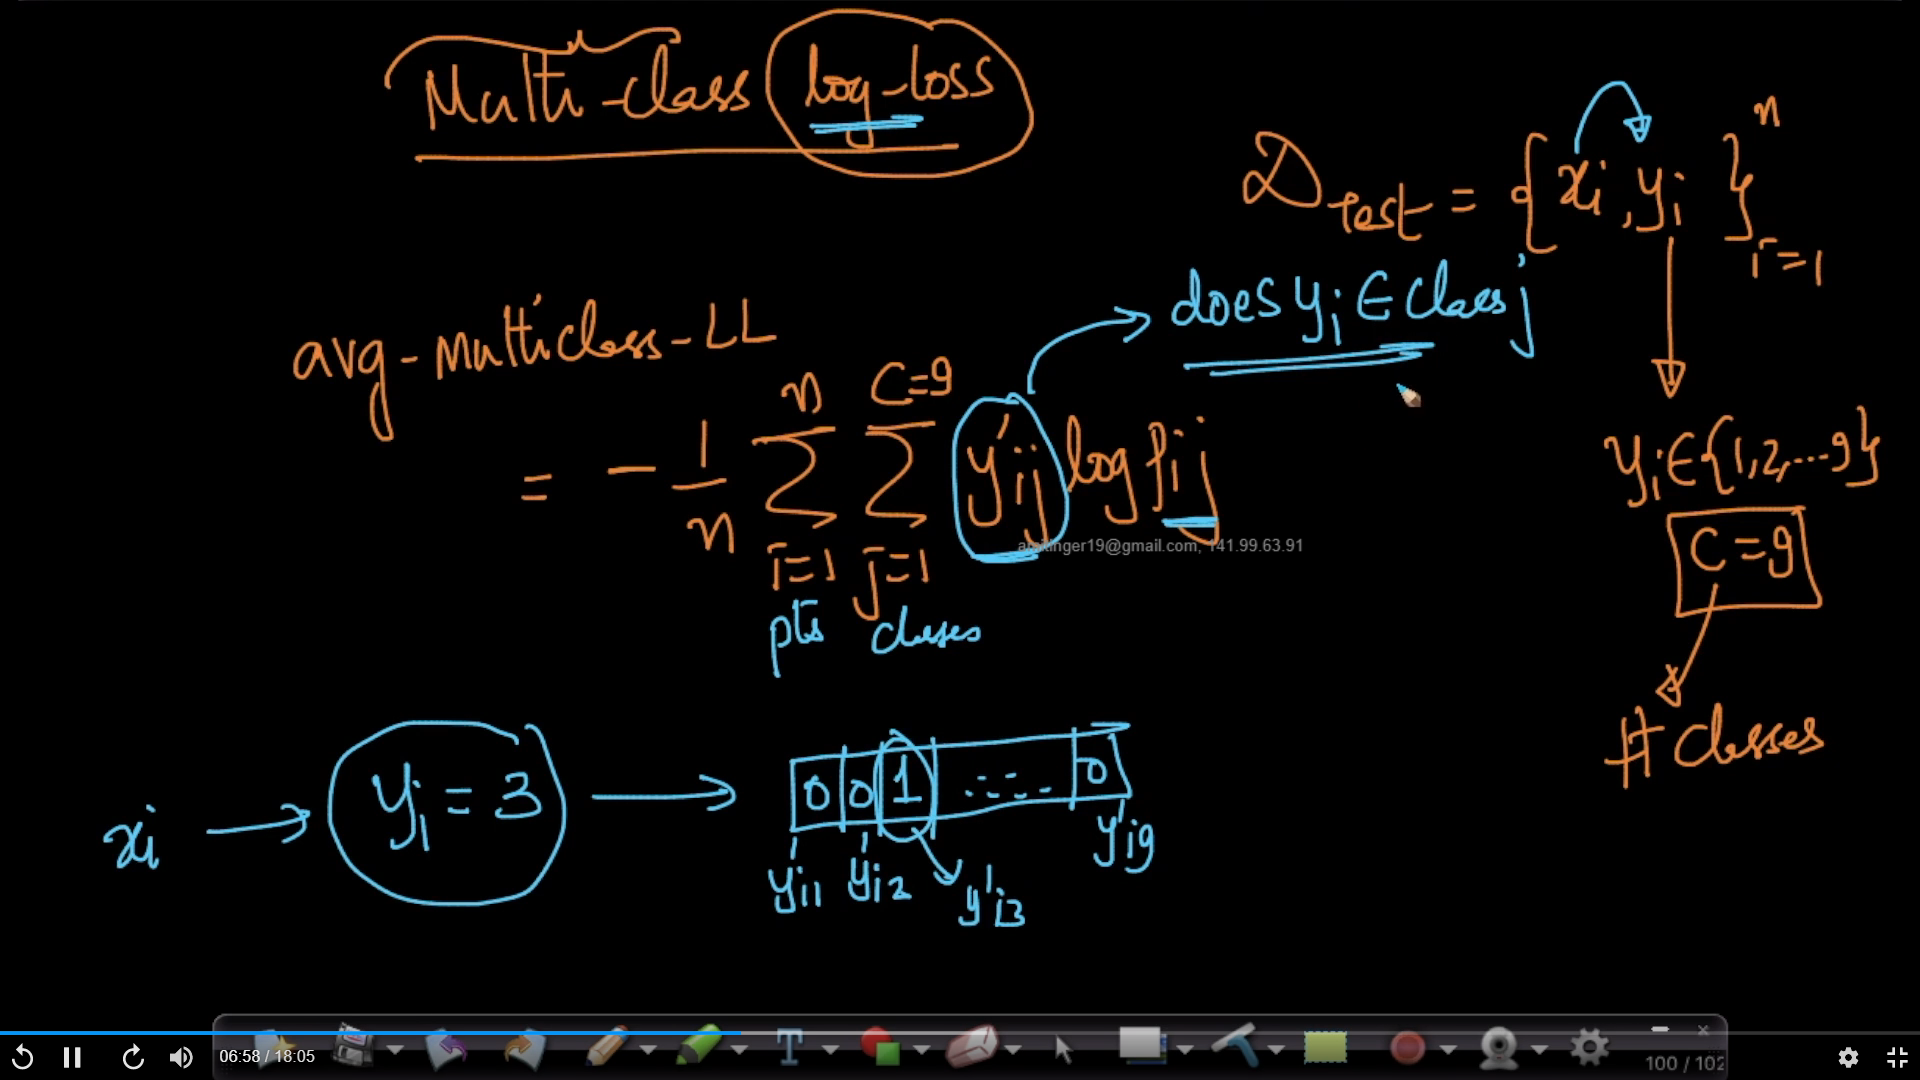**

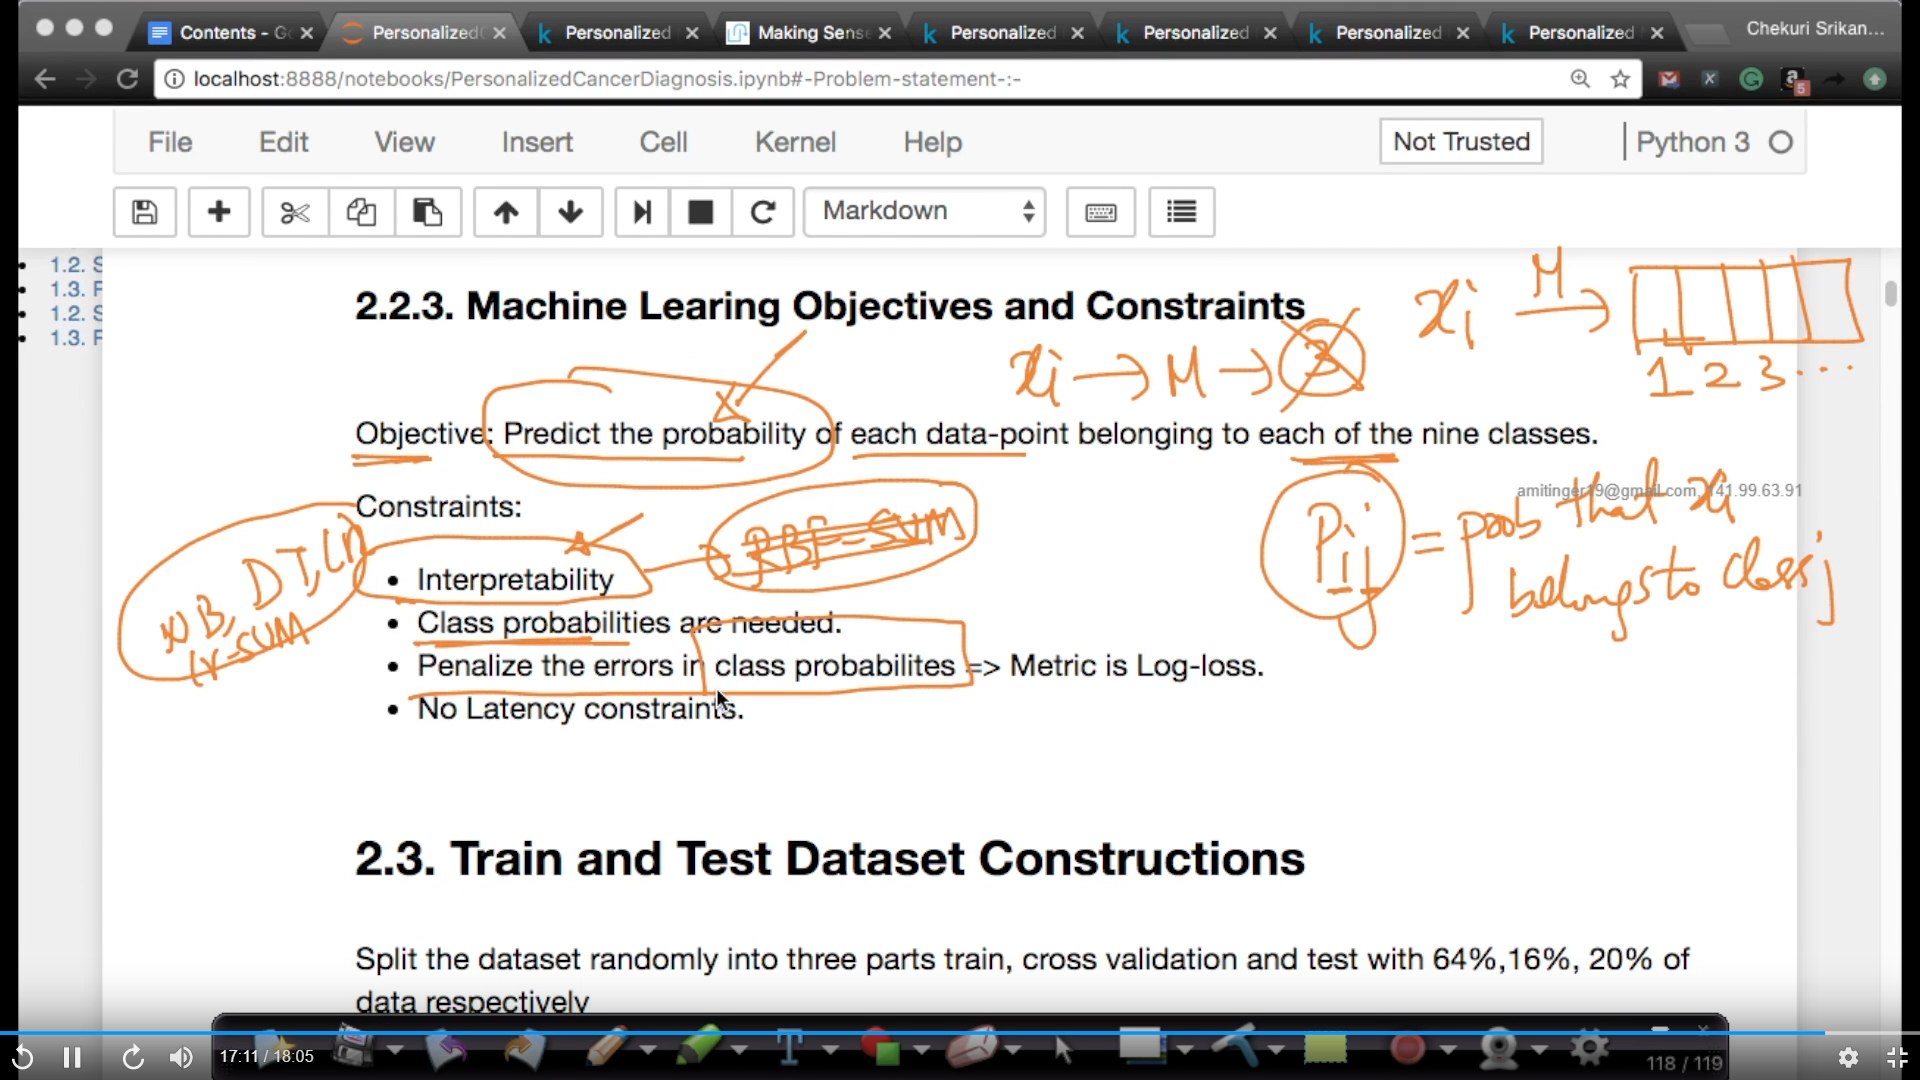

# **D. Exploratory Data Analysis**

In [3]:
data_variants_tr = pd.read_csv('/content/drive/My Drive/Cancer_Diagnosys/training_variants')
print('shape of variants data:',data_variants_tr.shape)
data_variants_tr.head()

shape of variants data: (3321, 4)


ID    Gene             Variation  Class
0   0  FAM58A  Truncating Mutations      1
1   1     CBL                 W802*      2
2   2     CBL                 Q249E      2
3   3     CBL                 N454D      3
4   4     CBL                 L399V      4

In [4]:
# note the seprator in this file
data_text =pd.read_csv("/content/drive/My Drive/Cancer_Diagnosys/training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


ID                                               TEXT
0   0  Cyclin-dependent kinases (CDKs) regulate a var...
1   1   Abstract Background  Non-small cell lung canc...
2   2   Abstract Background  Non-small cell lung canc...
3   3  Recent evidence has demonstrated that acquired...
4   4  Oncogenic mutations in the monomeric Casitas B...

In [5]:
data_text['TEXT'][1]

" Abstract Background  Non-small cell lung cancer (NSCLC) is a heterogeneous group of disorders with a number of genetic and proteomic alterations. c-CBL is an E3 ubiquitin ligase and adaptor molecule important in normal homeostasis and cancer. We determined the genetic variations of c-CBL, relationship to receptor tyrosine kinases (EGFR and MET), and functionality in NSCLC.  Methods and Findings  Using archival formalin-fixed paraffin embedded (FFPE) extracted genomic DNA, we show that c-CBL mutations occur in somatic fashion for lung cancers. c-CBL mutations were not mutually exclusive of MET or EGFR mutations; however they were independent of p53 and KRAS mutations. In normal/tumor pairwise analysis, there was significant loss of heterozygosity (LOH) for the c-CBL locus (22%, n\u200a=\u200a8/37) and none of these samples revealed any mutation in the remaining copy of c-CBL. The c-CBL LOH also positively correlated with EGFR and MET mutations observed in the same samples. Using selec

# **1.Text preprocessing**

In [6]:
import nltk
nltk.download('stopwords')
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
data_text['TEXT']

0       Cyclin-dependent kinases (CDKs) regulate a var...
1        Abstract Background  Non-small cell lung canc...
2        Abstract Background  Non-small cell lung canc...
3       Recent evidence has demonstrated that acquired...
4       Oncogenic mutations in the monomeric Casitas B...
                              ...                        
3316    Introduction  Myelodysplastic syndromes (MDS) ...
3317    Introduction  Myelodysplastic syndromes (MDS) ...
3318    The Runt-related transcription factor 1 gene (...
3319    The RUNX1/AML1 gene is the most frequent targe...
3320    The most frequent mutations associated with le...
Name: TEXT, Length: 3321, dtype: object

In [8]:
#text processing stage.
start_time = time.clock()
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

there is no text description for id: 1109
there is no text description for id: 1277
there is no text description for id: 1407
there is no text description for id: 1639
there is no text description for id: 2755
Time took for preprocessing the text : 29.268101 seconds


In [9]:
result = pd.merge(data_variants_tr,data_text,on='ID',how='left')

In [10]:
result.head()

ID    Gene  ... Class                                               TEXT
0   0  FAM58A  ...     1  cyclin dependent kinases cdks regulate variety...
1   1     CBL  ...     2  abstract background non small cell lung cancer...
2   2     CBL  ...     2  abstract background non small cell lung cancer...
3   3     CBL  ...     3  recent evidence demonstrated acquired uniparen...
4   4     CBL  ...     4  oncogenic mutations monomeric casitas b lineag...

[5 rows x 5 columns]

In [11]:
result.drop('ID',axis=1,inplace=True)

In [12]:
result.shape

(3321, 4)

In [13]:
result[result.isnull().any(axis=1)]

Gene             Variation  Class TEXT
1109   FANCA                S1088F      1  NaN
1277  ARID5B  Truncating Mutations      1  NaN
1407   FGFR3                 K508M      6  NaN
1639    FLT1         Amplification      6  NaN
2755    BRAF                 G596C      7  NaN

In [14]:
#result = pd.merge(data_variants_tr,data_text,on='ID',how='left')
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']
result[result['Gene']=='FANCA']

Gene  ...                                               TEXT
1108  FANCA  ...  fanconi anemia fa autosomal recessive disease ...
1109  FANCA  ...                                       FANCA S1088F
1110  FANCA  ...  abstract fanconi anemia characterized congenit...
1111  FANCA  ...  abstract fanconi anemia fa genomic instability...
1112  FANCA  ...  abstract fanconi anemia fa genomic instability...
1113  FANCA  ...  fanconi anemia fa genetic disease characterize...
1114  FANCA  ...  abstract fanconi anemia fa genomic instability...
1115  FANCA  ...  fanconi anemia fa recessively inherited diseas...
1116  FANCA  ...  abstract fanconi anemia fa genomic instability...

[9 rows x 4 columns]

# **2.Splitting Data into train,test and CV**

In [15]:

result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')
result_x = result.drop('Class',axis=1)
result_y = result['Class']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(result,result_y,stratify=result_y,test_size=0.2)
X_tr,X_cv,Y_tr,Y_cv = train_test_split(X_train,Y_train,stratify=Y_train,test_size=0.2)

print('Train data shape: ',X_tr.shape)
print('Train class shape: ',Y_tr.shape)
print('Test data shape: ',X_test.shape)
print('Test class shape: ',Y_test.shape)
print('CV data shape: ',X_cv.shape)
print('CV class shape: ',Y_cv.shape)

Train data shape:  (2124, 4)
Train class shape:  (2124,)
Test data shape:  (665, 4)
Test class shape:  (665,)
CV data shape:  (532, 4)
CV class shape:  (532,)


In [16]:
len(X_cv['Gene'].unique())

148

# **3.Checking for imbalance in data across train,test and CV**

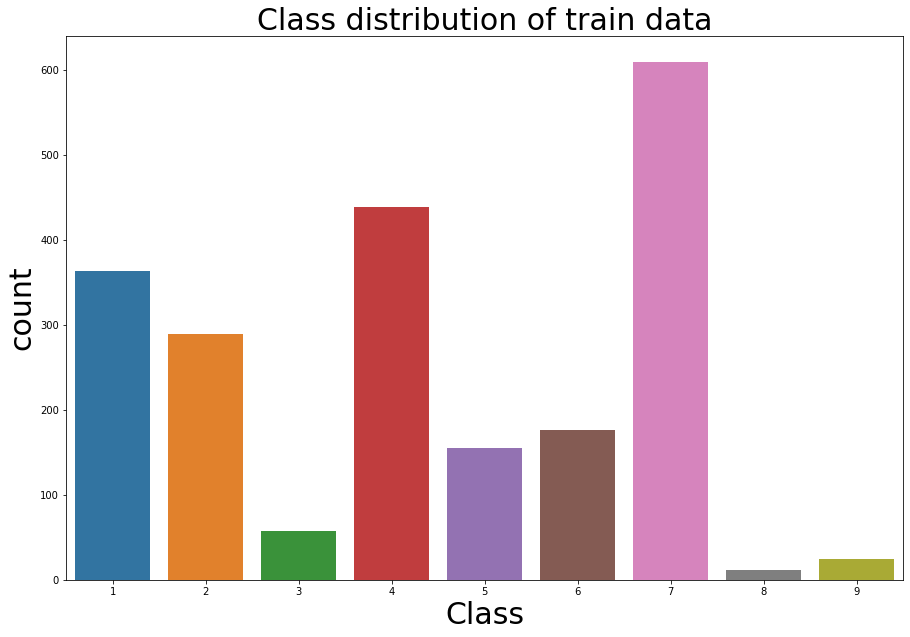

share of class 1 is 17.09039548022599 with 363 datapoints.
share of class 2 is 13.606403013182675 with 289 datapoints.
share of class 3 is 2.6836158192090394 with 57 datapoints.
share of class 4 is 20.66854990583804 with 439 datapoints.
share of class 5 is 7.297551789077213 with 155 datapoints.
share of class 6 is 8.286252354048964 with 176 datapoints.
share of class 7 is 28.672316384180792 with 609 datapoints.
share of class 8 is 0.5649717514124294 with 12 datapoints.
share of class 9 is 1.1299435028248588 with 24 datapoints.


In [17]:
plt.figure(figsize=(15,10))
sns.countplot(Y_tr)
plt.title('Class distribution of train data',fontsize=30)
plt.xlabel('Class',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.show()
for i in range(1,10):
 print('share of class {0} is {1} with {2} datapoints.'.format(i,100*(Y_tr[Y_tr==i].count())/len(Y_tr),Y_tr[Y_tr==i].count()))

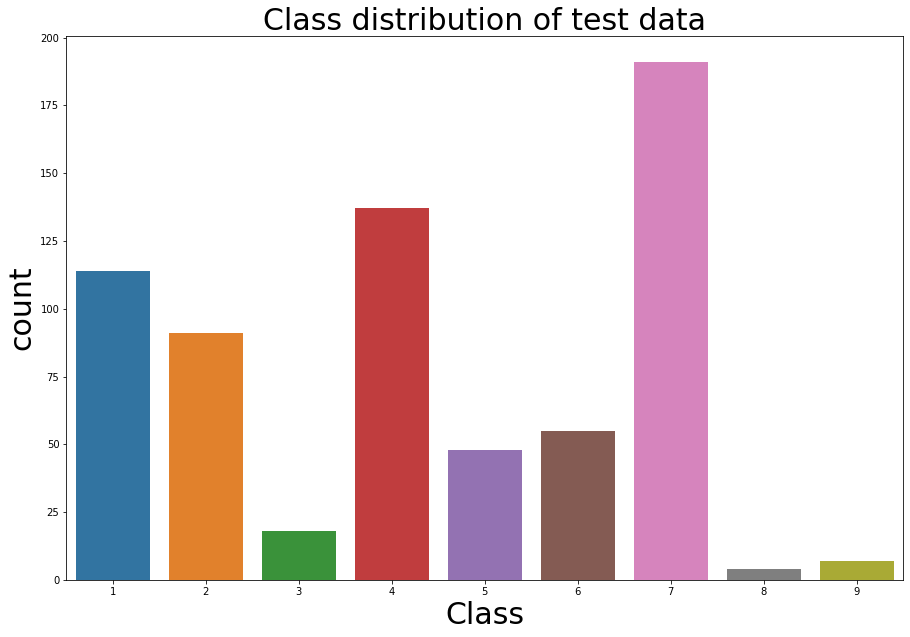

share of class 1 is 17.142857142857142 with 114 datapoints.
share of class 2 is 13.68421052631579 with 91 datapoints.
share of class 3 is 2.706766917293233 with 18 datapoints.
share of class 4 is 20.601503759398497 with 137 datapoints.
share of class 5 is 7.2180451127819545 with 48 datapoints.
share of class 6 is 8.270676691729323 with 55 datapoints.
share of class 7 is 28.721804511278197 with 191 datapoints.
share of class 8 is 0.6015037593984962 with 4 datapoints.
share of class 9 is 1.0526315789473684 with 7 datapoints.


In [18]:
plt.figure(figsize=(15,10))
sns.countplot(Y_test)
plt.title('Class distribution of test data',fontsize=30)
plt.xlabel('Class',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.show()
for i in range(1,10):
 print('share of class {0} is {1} with {2} datapoints.'.format(i,100*(Y_test[Y_test==i].count())/len(Y_test),Y_test[Y_test==i].count()))

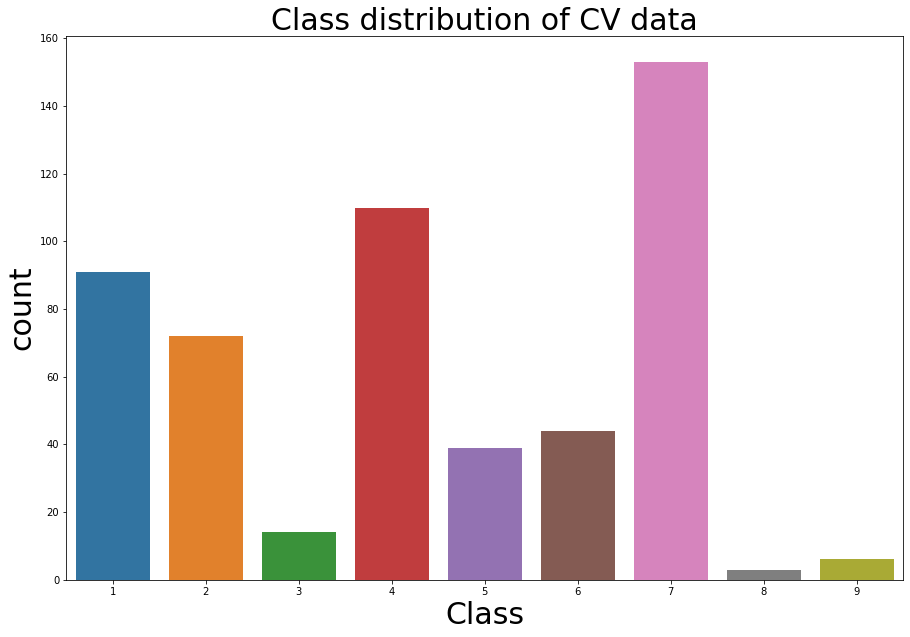

share of class 1 is 17.105263157894736 with 91 datapoints.
share of class 2 is 13.533834586466165 with 72 datapoints.
share of class 3 is 2.6315789473684212 with 14 datapoints.
share of class 4 is 20.67669172932331 with 110 datapoints.
share of class 5 is 7.330827067669173 with 39 datapoints.
share of class 6 is 8.270676691729323 with 44 datapoints.
share of class 7 is 28.7593984962406 with 153 datapoints.
share of class 8 is 0.5639097744360902 with 3 datapoints.
share of class 9 is 1.1278195488721805 with 6 datapoints.


In [19]:
plt.figure(figsize=(15,10))
sns.countplot(Y_cv)
plt.title('Class distribution of CV data',fontsize=30)
plt.xlabel('Class',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.show()
for i in range(1,10):
 print('share of class {0} is {1} with {2} datapoints.'.format(i,100*(Y_cv[Y_cv==i].count())/len(Y_cv),Y_cv[Y_cv==i].count()))

# *Conclusion: <br>1.We have Imbalanced datasets among Class.<br>2. Our distribution of class across train, test and CV are almost same.*

# **4. Testing a dummy model and getting its log-loss score**<h5><br>Why we need dummy model?<br>Ans: Becuase the business requirement is to have multilog loss and we know that log-loss=[0,inf]. So if we have some log-loss let say 2.1 then we don't have reference to compare if this model is good or bad. So we need a dummy model  and compare our model with log-loss of dummy model to know where we are.

Log loss on Cross Validation Data using Random Model 2.5194144421835425
Log loss on Test Data using Random Model 2.4905133405600153
-------------------- Confusion matrix --------------------


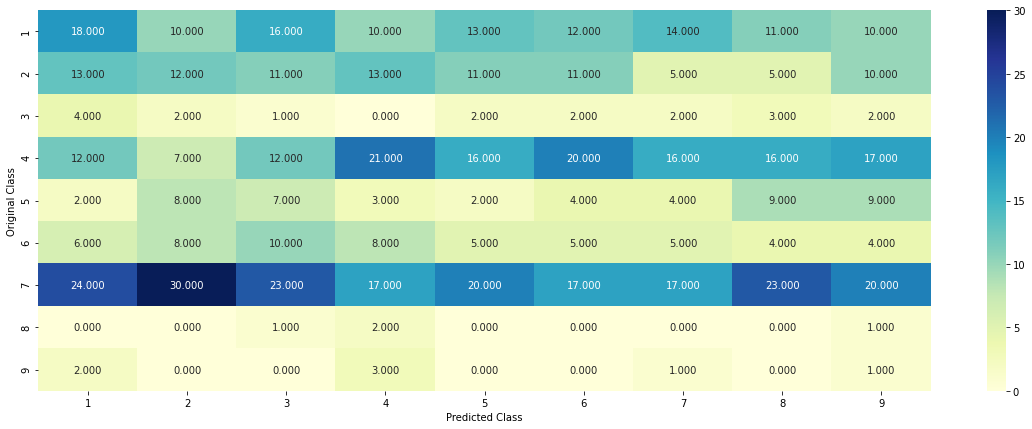

-------------------- Precision matrix (Columm Sum=1) --------------------


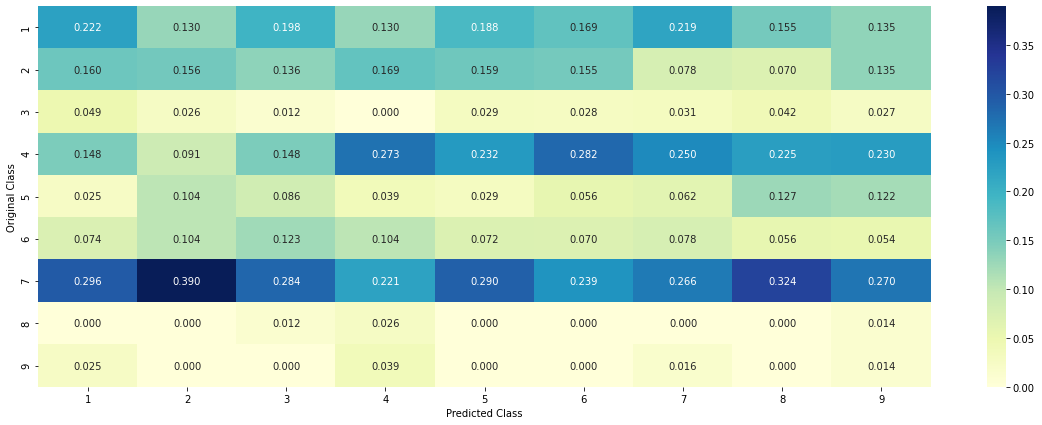

-------------------- Recall matrix (Row sum=1) --------------------


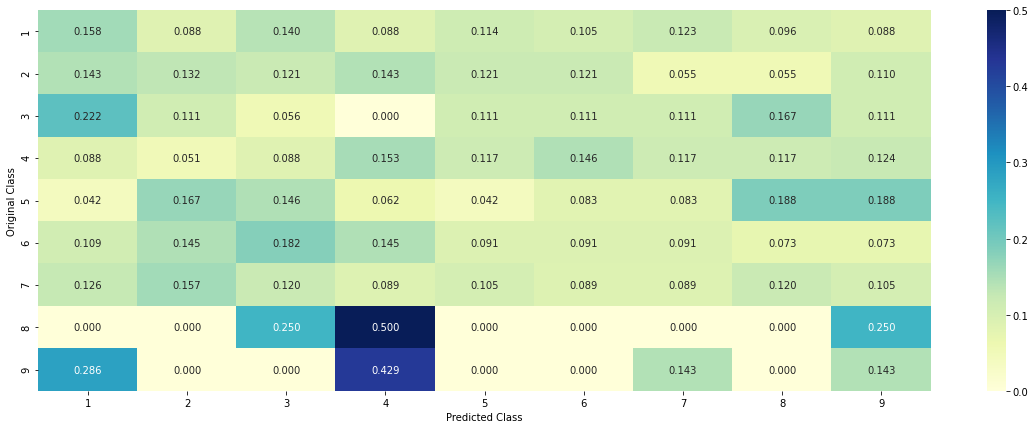

In [20]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()



    # we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(Y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(Y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(Y_test, predicted_y+1)

# <I>Text Encoding block<br>1.Response Encoding with laplace smoothing<br>2. One Hot Encoding<br>3. TFIDF Encoding

In [21]:
def res_encoding(cat_feature_tr,cat_feature,tar_class_tr):
  genes = list(set(cat_feature))
  vec_list = []
  #print(genes)
  df = pd.DataFrame({'cat_feature':cat_feature_tr,'tar_class':tar_class_tr})
  #print('line 2')
  #print(df)
  dic_feature_prob_given_target = {}
  for i in genes:
    dic_feature_prob_given_target[i]=[]
    for j in range(1,10):
         #print('inside 2nd for loop') 
         #print(df[(df.cat_feature==i) & (df.tar_class==j)].count() / (df[df.cat_feature==i].count()))
         dic_feature_prob_given_target[i].append(((df['cat_feature'][(df['cat_feature']==i) & (df['tar_class']==j)].count())+10) / ((df['cat_feature'][df['cat_feature']==i].count())+90))
         #print('below dict')
  for i in cat_feature:
    vec_list.append(dic_feature_prob_given_target[i])       
  return np.array(vec_list)




def one_hot_encoding(feature_tr,feature):
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.preprocessing import StandardScaler
    scaler=StandardScaler()
    one_hot_encoder = CountVectorizer()
    one_hot_encoder.fit(feature_tr)
    one_hot_vec = one_hot_encoder.transform(feature).toarray()
    scaler.fit(one_hot_vec)
    return scaler.transform(one_hot_vec)


def tfidf_vectorizer(feature_tr,feature):
    from sklearn.feature_extraction.text import TfidfVectorizer 
    tfidf = TfidfVectorizer(ngram_range=(1,2), binary=True, max_features=1000)
    tfidf.fit_transform(feature_tr)
    vec= tfidf.transform(feature).toarray()
    #print(tfidf.get_feature_names())
    return vec

# **5.Univariate Analysis**<br><h5>To check the feature importance when we have <b><I>less number of dimensions</I></b> in our original dataset is to build a simple sensible linear model on top of each feature and watch the performance of the model. If its performing considerably better than the dummy model score then this feature is important for our objective. Otherwise we have perform some other advanced testing on features.

# *5.1: Feature--> Gene*

# <h5>1. What kind of feature(data type) is this?<br>2.What are the different categories and how many are they?<br>3.How to featurize it?<br>4.How well this feature is performing?<br>5.6.Is this feature stable across all dataset(train,test and CV)?</h5><br><br>We will try to answer all these questions with good amount of reasoning.

# <h5>Ans(1): This feature is categorical type feature

In [22]:
len(result['Gene'].unique())

264

# <h5>Ans(2): We have <b>262</b> different types of genes.<br>Ans(3): Response, One Hot, TFIDF

# *5.2:Vectorizing Gene*

In [23]:
gene_one_hot_tr = one_hot_encoding(X_tr['Gene'],X_tr['Gene'])
gene_response_tr = res_encoding(X_tr['Gene'],X_tr['Gene'],Y_tr)
gene_tfidf_tr = tfidf_vectorizer(X_tr['Gene'],X_tr['Gene'])

gene_one_hot_cv = one_hot_encoding(X_tr['Gene'],X_cv['Gene'])
gene_response_cv = res_encoding(X_tr['Gene'],X_cv['Gene'],Y_cv)
gene_tfidf_cv = tfidf_vectorizer(X_tr['Gene'],X_cv['Gene'])

gene_one_hot_test = one_hot_encoding(X_tr['Gene'],X_test['Gene'])
gene_response_test = res_encoding(X_tr['Gene'],X_test['Gene'],Y_test)
gene_tfidf_test = tfidf_vectorizer(X_tr['Gene'],X_test['Gene'])

# *5.3: Applying simple logistic regression on "Gene"  feature*

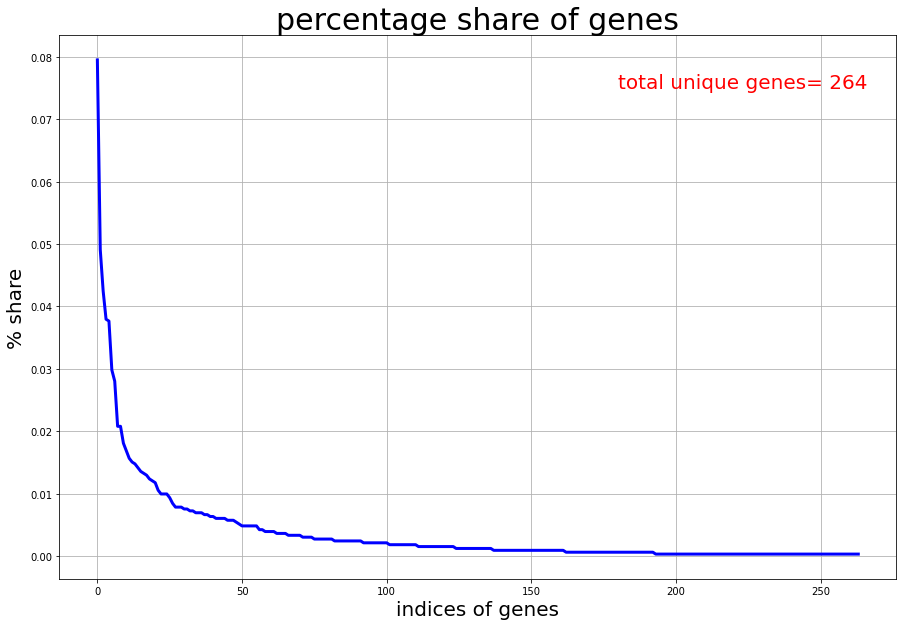

In [25]:
uniq_val = result['Gene'].value_counts()
plt.figure(figsize=(15,10))
plt.plot(uniq_val.values / uniq_val.sum(),color='blue',linewidth=3)
plt.title('percentage share of genes',fontsize=30)
plt.grid(b=True)
plt.xlabel('indices of genes',fontsize=20)
plt.ylabel('% share',fontsize=20)
plt.annotate('total unique genes= '+str(len(uniq_val)),xy=(180,0.075),fontsize=20,color='red' )
plt.show()


# *The curve drops very fast which means that very few of the gens are dominating in numbers.*

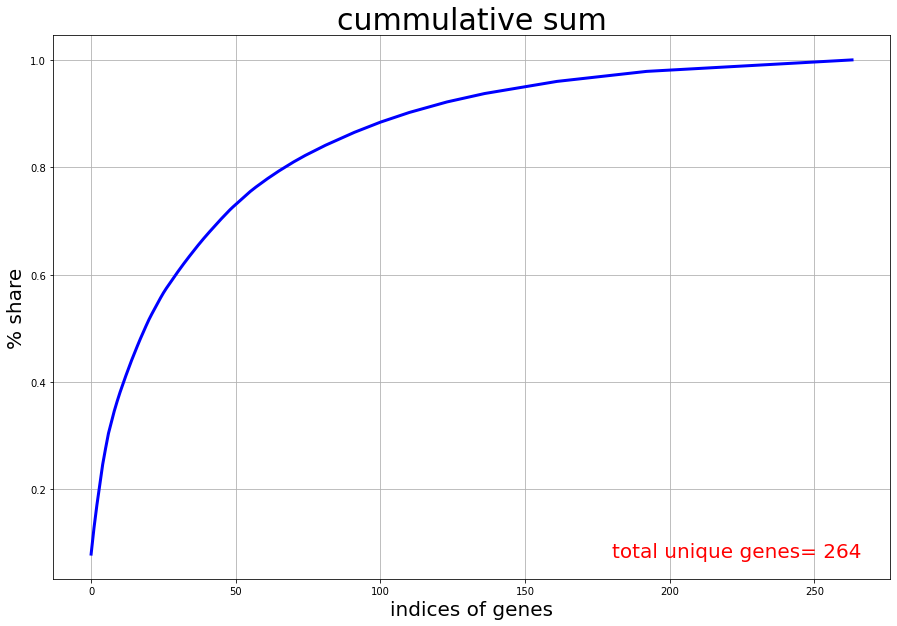

In [26]:
cs = np.cumsum(uniq_val.values / uniq_val.sum())
plt.figure(figsize=(15,10))
plt.plot(cs,color='blue',linewidth=3)
plt.title('cummulative sum',fontsize=30)
plt.grid(b=True)
plt.xlabel('indices of genes',fontsize=20)
plt.ylabel('% share',fontsize=20)
plt.annotate('total unique genes= '+str(len(uniq_val)),xy=(180,0.075),fontsize=20,color='red' )
plt.show()

# *We can see that only close to 60 genes comprise of 80% of the total genes. Or in other words we can say that 60/262 = 23 % of the total unique genes account for 80% of total genes.*

# *5.4: Checking performance of gene on LR model*

In [27]:
def performance(vector_tr,vector_test,vector_cv,Y_tr,Y_test,Y_cv,alpha):
  error_cv=[]
  error_tr=[]
  error_test = []
  for i in alpha:
      clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
      clf.fit(vector_tr, Y_tr)
      sig_clf = CalibratedClassifierCV(clf, method="sigmoid") # we want our predicted value to be a probability for the interpretability hence we are using CalibratedClassifierCV
      sig_clf.fit(vector_tr,Y_tr)
      predict_y_tr = sig_clf.predict_proba(vector_tr)
      predict_y = sig_clf.predict_proba(vector_cv)
      predict_y_test = sig_clf.predict_proba(vector_test)
      error_cv.append(log_loss(Y_cv, predict_y, labels=clf.classes_, eps=1e-15))
      error_tr.append(log_loss(Y_tr, predict_y_tr, labels=clf.classes_, eps=1e-15))
      error_test.append(log_loss(Y_test, predict_y_test, labels=clf.classes_, eps=1e-15))  
  plt.figure(figsize=(15,10))
  plt.plot(error_cv,color='blue',linewidth=3)
  plt.plot(error_tr,color='grey',linewidth=3)
  plt.plot(error_test,color='red',linewidth=3)
  plt.title('performance checker',fontsize=30)
  plt.grid(b=True)
  plt.legend(['CV','Train','test'])
  plt.xlabel('Hyperparameter value',fontsize=20)
  plt.ylabel('log-loss',fontsize=20)
  #for i,j in zip(alpha,error_cv):
      #plt.annotate(str(round(j,2)),xy=(i,j),fontsize=20,color='grey' )
  plt.show()
  for i in (range(len(alpha))):
    print('Log loss is train =  {0}, test = {1} and cv = {2} for alpha value {3}'.format(error_tr[i],error_test[i],error_cv[i],alpha[i] )) 
 




************************************************** One Hot Encoding **************************************************


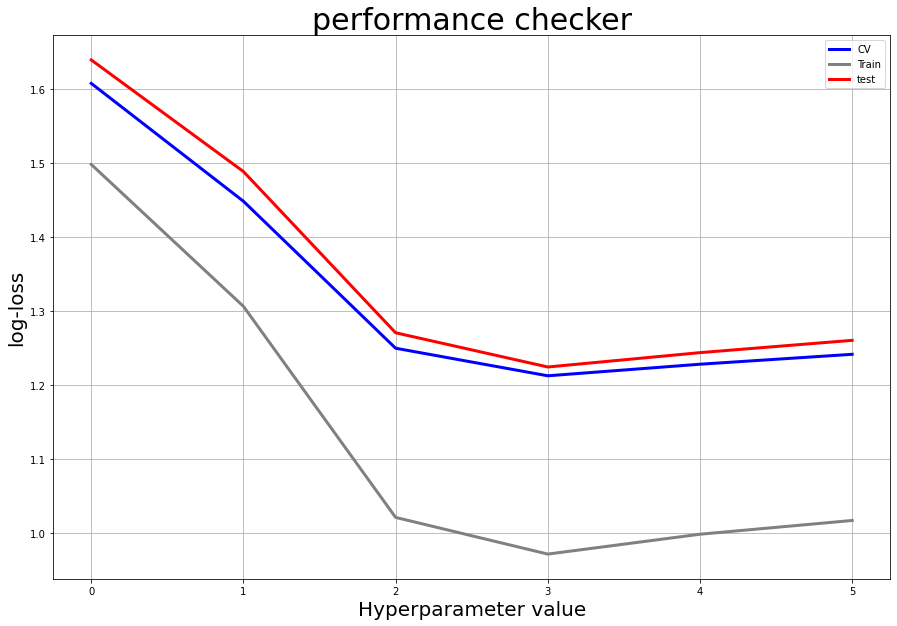

Log loss is train =  1.498094763845548, test = 1.6393045368599446 and cv = 1.6076031891126104 for alpha value 1e-05
Log loss is train =  1.3063436089549698, test = 1.4884512811147306 and cv = 1.4483273010614957 for alpha value 0.0001
Log loss is train =  1.0211414726124461, test = 1.2706029225321163 and cv = 1.249738075133721 for alpha value 0.001
Log loss is train =  0.9715774433670301, test = 1.2243841415515866 and cv = 1.2124859179482224 for alpha value 0.01
Log loss is train =  0.9984198774746033, test = 1.2437795199801736 and cv = 1.2281212475942853 for alpha value 0.1
Log loss is train =  1.0169987635076818, test = 1.2603997626948305 and cv = 1.2415253764259722 for alpha value 1
************************************************** Response Encoding **************************************************


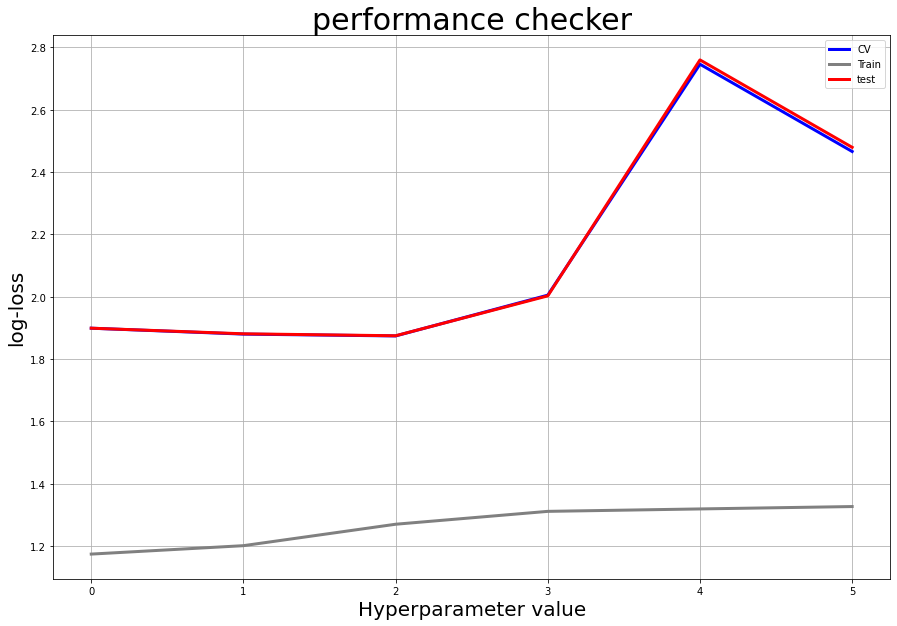

Log loss is train =  1.1739729516540685, test = 1.8986898722723924 and cv = 1.8986536294788774 for alpha value 1e-05
Log loss is train =  1.2009824490760939, test = 1.8806574853689986 and cv = 1.879704088192722 for alpha value 0.0001
Log loss is train =  1.2697498410967543, test = 1.8743977086833936 and cv = 1.8738560663463488 for alpha value 0.001
Log loss is train =  1.3110488506875002, test = 2.002430807320321 and cv = 2.0046872024086855 for alpha value 0.01
Log loss is train =  1.3188429887250057, test = 2.7593578246542187 and cv = 2.74549960287669 for alpha value 0.1
Log loss is train =  1.3264740023869768, test = 2.4789505474444367 and cv = 2.465543364878499 for alpha value 1
************************************************** TFIDF Encoding **************************************************


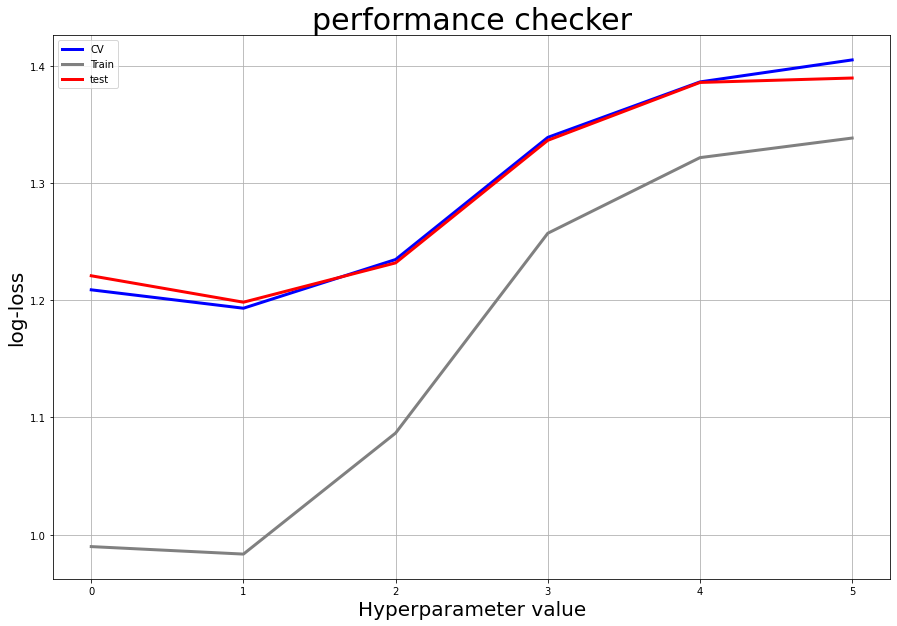

Log loss is train =  0.9898541734389097, test = 1.2208152440982811 and cv = 1.208835719570268 for alpha value 1e-05
Log loss is train =  0.9834650046732705, test = 1.198274749352959 and cv = 1.1931376758122683 for alpha value 0.0001
Log loss is train =  1.0866901946108936, test = 1.2318119065844626 and cv = 1.2346885494543962 for alpha value 0.001
Log loss is train =  1.2570800875679424, test = 1.3363252766281153 and cv = 1.338826752117572 for alpha value 0.01
Log loss is train =  1.321568352606412, test = 1.3856893855200416 and cv = 1.386137497785834 for alpha value 0.1
Log loss is train =  1.338270987338341, test = 1.389459387956522 and cv = 1.4049074691234595 for alpha value 1


In [28]:
print('*'*50,'One Hot Encoding','*'*50)
alpha = [10 ** x for x in range(-5, 1)]
performance(gene_one_hot_tr,gene_one_hot_test,gene_one_hot_cv,Y_tr,Y_test,Y_cv,alpha) 
print('*'*50,'Response Encoding','*'*50)
performance(gene_response_tr,gene_response_test,gene_response_cv,Y_tr,Y_test,Y_cv,alpha) 
print('*'*50,'TFIDF Encoding','*'*50)
performance(gene_tfidf_tr,gene_tfidf_test,gene_tfidf_cv,Y_tr,Y_test,Y_cv,alpha) 

# ***Conclusions: As we can see the plots One Hot Encoding with Logistic Regression ic clear winner here. which gives <br>Log loss:<br>train =   0.9692737068978126 <br>test =  1.2023913664730606 <br>cv =  1.2238253204212632 <br>for alpha value 0.0001<br>Vectorizer: TFIDF***<br>From this we van conclude that feature GENE is a very important feature when compared to dummy model which had logloss=2.5.

# **6: Feature: Variation**<br> we will do similar analysis  for this feature too as done for Gene.

# *6.1: Vectorization*

In [29]:
var_one_hot_tr = one_hot_encoding(X_tr['Variation'],X_tr['Variation'])
var_response_tr = res_encoding(X_tr['Variation'],X_tr['Variation'],Y_tr)
var_tfidf_tr = tfidf_vectorizer(X_tr['Variation'],X_tr['Variation'])

var_one_hot_cv = one_hot_encoding(X_tr['Variation'],X_cv['Variation'])
var_response_cv = res_encoding(X_tr['Variation'],X_cv['Variation'],Y_cv)
var_tfidf_cv = tfidf_vectorizer(X_tr['Variation'],X_cv['Variation'])

var_one_hot_test = one_hot_encoding(X_tr['Variation'],X_test['Variation'])
var_response_test = res_encoding(X_tr['Variation'],X_test['Variation'],Y_test)
var_tfidf_test = tfidf_vectorizer(X_tr['Variation'],X_test['Variation'])

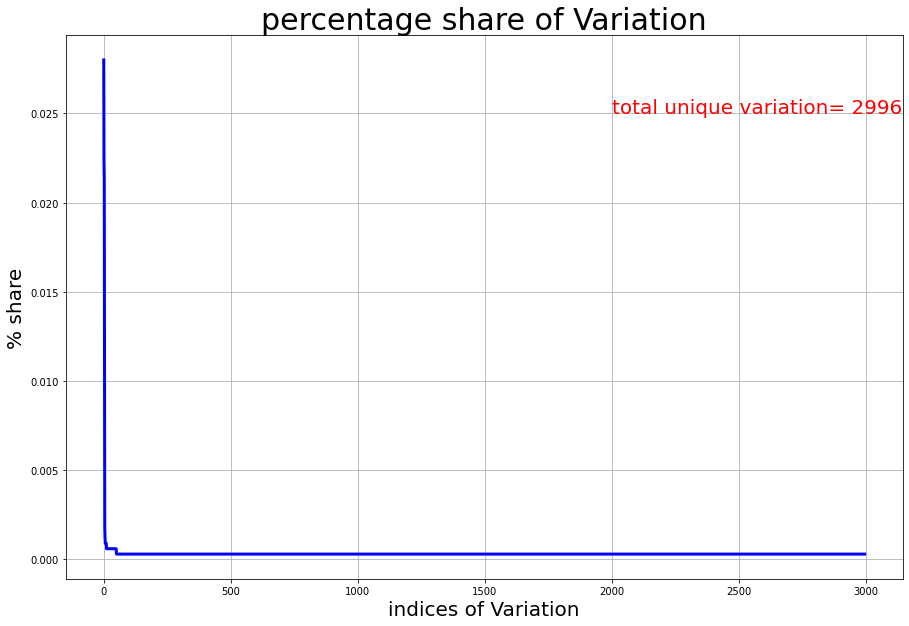

In [30]:
uniq_val_var = result['Variation'].value_counts()
plt.figure(figsize=(15,10))
plt.plot(uniq_val_var.values / uniq_val_var.sum(),color='blue',linewidth=3)
plt.title('percentage share of Variation',fontsize=30)
plt.grid(b=True)
plt.xlabel('indices of Variation',fontsize=20)
plt.ylabel('% share',fontsize=20)
plt.annotate('total unique variation= '+str(len(uniq_val_var)),xy=(2000,0.025),fontsize=20,color='red' )
plt.show()

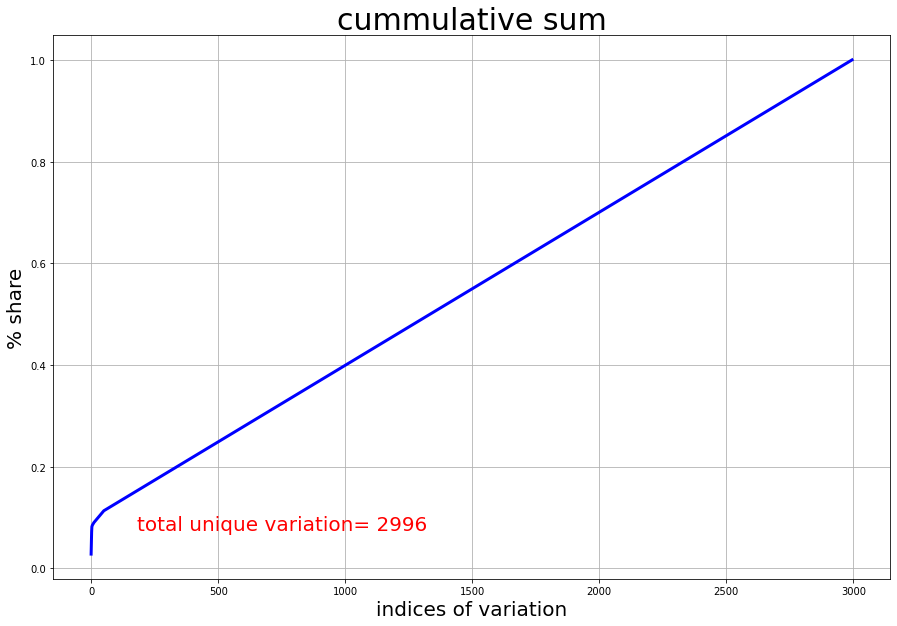

In [31]:
cs = np.cumsum(uniq_val_var.values / uniq_val_var.sum())
plt.figure(figsize=(15,10))
plt.plot(cs,color='blue',linewidth=3)
plt.title('cummulative sum',fontsize=30)
plt.grid(b=True)
plt.xlabel('indices of variation',fontsize=20)
plt.ylabel('% share',fontsize=20)
plt.annotate('total unique variation= '+str(len(uniq_val_var)),xy=(180,0.075),fontsize=20,color='red' )
plt.show()

************************************************** One Hot Encoding **************************************************


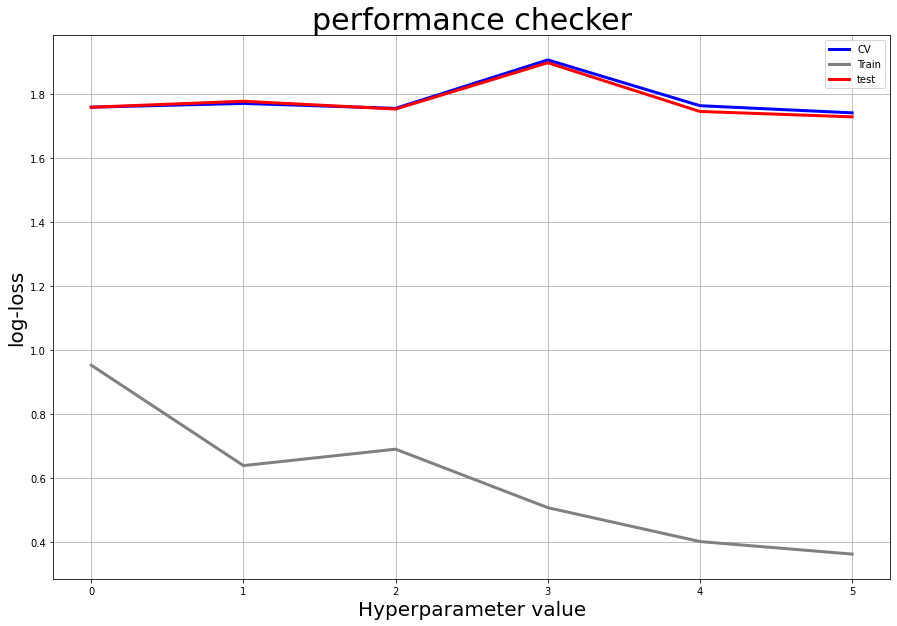

Log loss is train =  0.9518073672151989, test = 1.7581556922062287 and cv = 1.7582874598973632 for alpha value 1e-05
Log loss is train =  0.6378882732959633, test = 1.7768919605650821 and cv = 1.770045828560724 for alpha value 0.0001
Log loss is train =  0.6892167382788279, test = 1.7525694160826104 and cv = 1.7546951655256087 for alpha value 0.001
Log loss is train =  0.506371836207662, test = 1.8971937557027778 and cv = 1.9061054063759593 for alpha value 0.01
Log loss is train =  0.4004525617607103, test = 1.7449105434413352 and cv = 1.7629412954979073 for alpha value 0.1
Log loss is train =  0.36126075701724514, test = 1.7281370398130418 and cv = 1.7405965330050868 for alpha value 1
************************************************** Response Encoding **************************************************


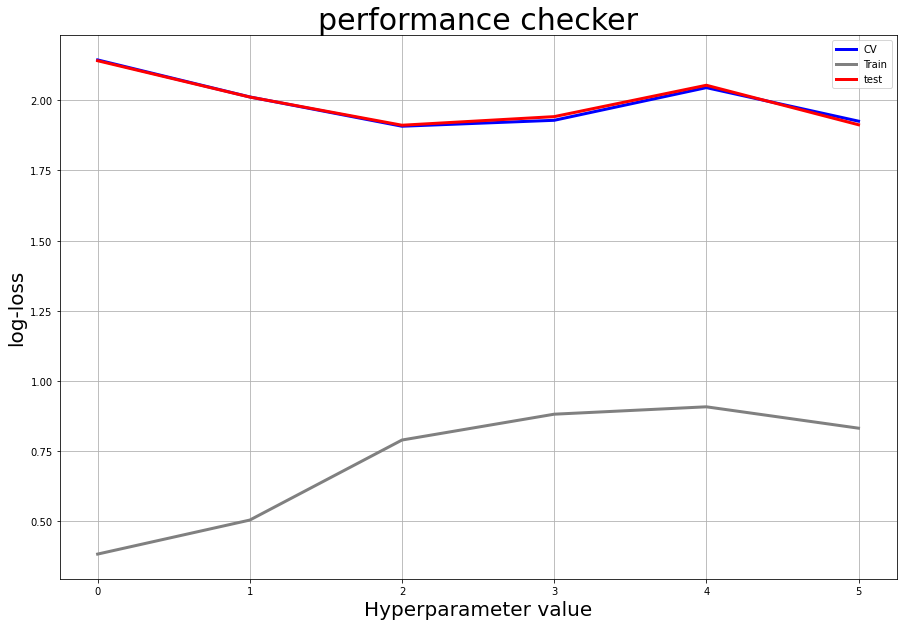

Log loss is train =  0.38283654557545277, test = 2.1405568163190596 and cv = 2.1434366468183477 for alpha value 1e-05
Log loss is train =  0.5040594596070606, test = 2.0111767331833197 and cv = 2.011463651934022 for alpha value 0.0001
Log loss is train =  0.7892049959790846, test = 1.910737686584975 and cv = 1.9071729476548716 for alpha value 0.001
Log loss is train =  0.8812242916674822, test = 1.9413538063536673 and cv = 1.9282809019871763 for alpha value 0.01
Log loss is train =  0.9075675090587214, test = 2.053128535264798 and cv = 2.0446518280869945 for alpha value 0.1
Log loss is train =  0.8314007512489443, test = 1.9123816573083807 and cv = 1.9252047232192082 for alpha value 1
************************************************** TFIDF Encoding **************************************************


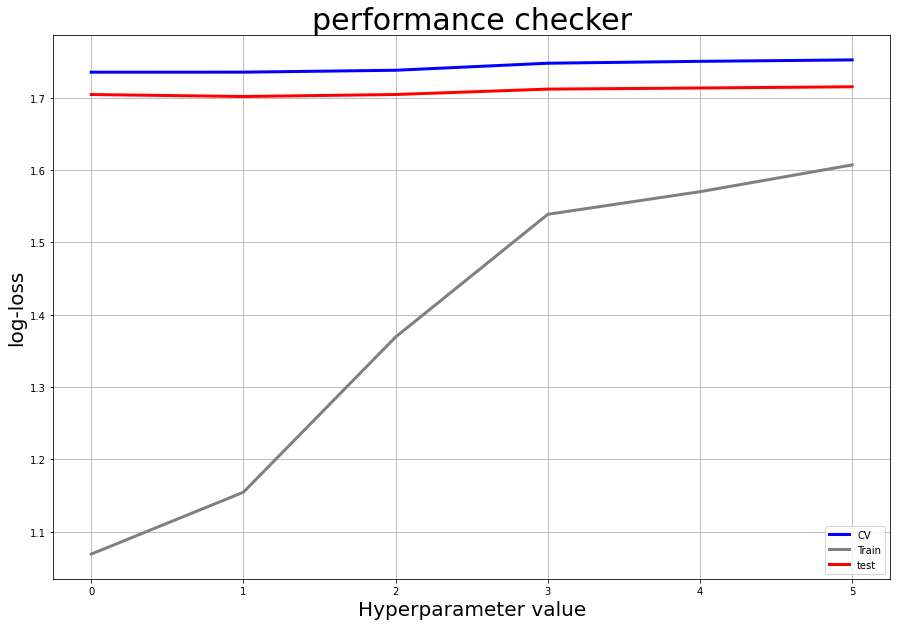

Log loss is train =  1.0692740389521884, test = 1.7041536555408936 and cv = 1.7350189851715894 for alpha value 1e-05
Log loss is train =  1.1547526568744093, test = 1.7014188614000243 and cv = 1.7350630651845933 for alpha value 0.0001
Log loss is train =  1.369161446976974, test = 1.7041699685263543 and cv = 1.7376766138647273 for alpha value 0.001
Log loss is train =  1.5386646288970096, test = 1.7116273499438956 and cv = 1.7474002219657947 for alpha value 0.01
Log loss is train =  1.5699074225629772, test = 1.713164942306117 and cv = 1.7499986053863616 for alpha value 0.1
Log loss is train =  1.606933147114838, test = 1.7148641346812608 and cv = 1.7519768337530643 for alpha value 1


In [32]:
print('*'*50,'One Hot Encoding','*'*50)
alpha = [10 ** x for x in range(-5, 1)]
performance(var_one_hot_tr,var_one_hot_test,var_one_hot_cv,Y_tr,Y_test,Y_cv,alpha) 
print('*'*50,'Response Encoding','*'*50)
performance(var_response_tr,var_response_test,var_response_cv,Y_tr,Y_test,Y_cv,alpha) 
print('*'*50,'TFIDF Encoding','*'*50)
performance(var_tfidf_tr,var_tfidf_test,var_tfidf_cv,Y_tr,Y_test,Y_cv,alpha) 

# *Conclusion: Best Parameters <br>LOG LOSS:<br>1.Train: Log loss is train =  1.5228744040325863, <br>2.test = 1.7612085943648 <br>3.cv =  1.723253016015784<br>4.alpha = 1*<br>5. Vectorizer: TFIDF<br> Variation feature is not that strongly relatedto target value than GENE was. And we can also see that train loss and cv_loss and test_loss are having huge variance in terms of tfidf and one hot encoding. This tells us that this feature is trying to overfit the data. <br> But nonetheless it is performing way better than the dummy model and GENE feature. So we should definitely keep this feature. 

# *7: Feature: TEXT*

In [33]:

text_one_hot_tr = one_hot_encoding(X_tr['TEXT'],X_tr['TEXT'])
text_response_tr = res_encoding(X_tr['TEXT'],X_tr['TEXT'],Y_tr)
text_tfidf_tr = tfidf_vectorizer(X_tr['TEXT'],X_tr['TEXT'])

text_one_hot_cv = one_hot_encoding(X_tr['TEXT'],X_cv['TEXT'])
text_response_cv = res_encoding(X_tr['TEXT'],X_cv['TEXT'],Y_cv)
text_tfidf_cv = tfidf_vectorizer(X_tr['TEXT'],X_cv['TEXT'])

text_one_hot_test = one_hot_encoding(X_tr['TEXT'],X_test['TEXT'])
text_response_test = res_encoding(X_tr['TEXT'],X_test['TEXT'],Y_test)
text_tfidf_test = tfidf_vectorizer(X_tr['TEXT'],X_test['TEXT'])

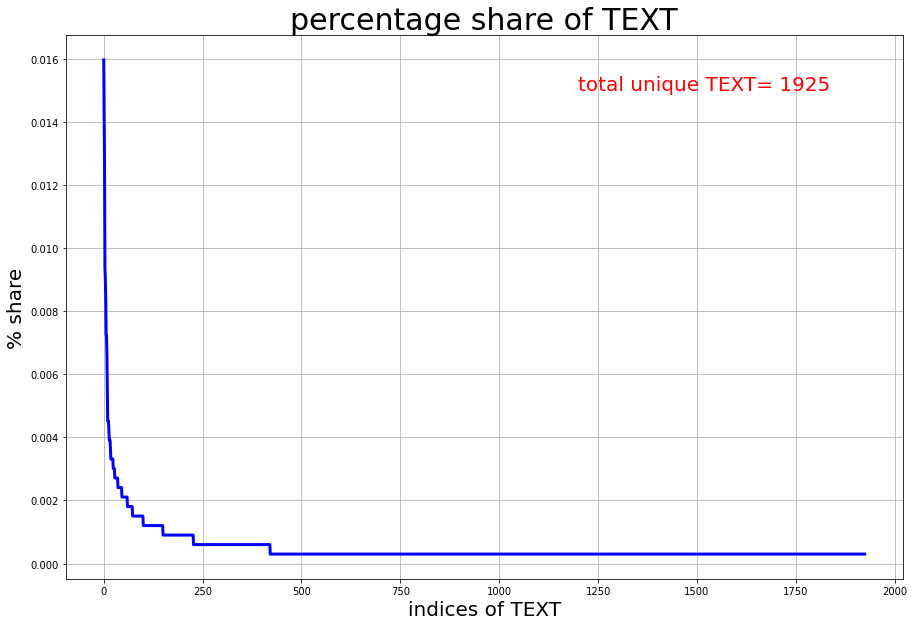

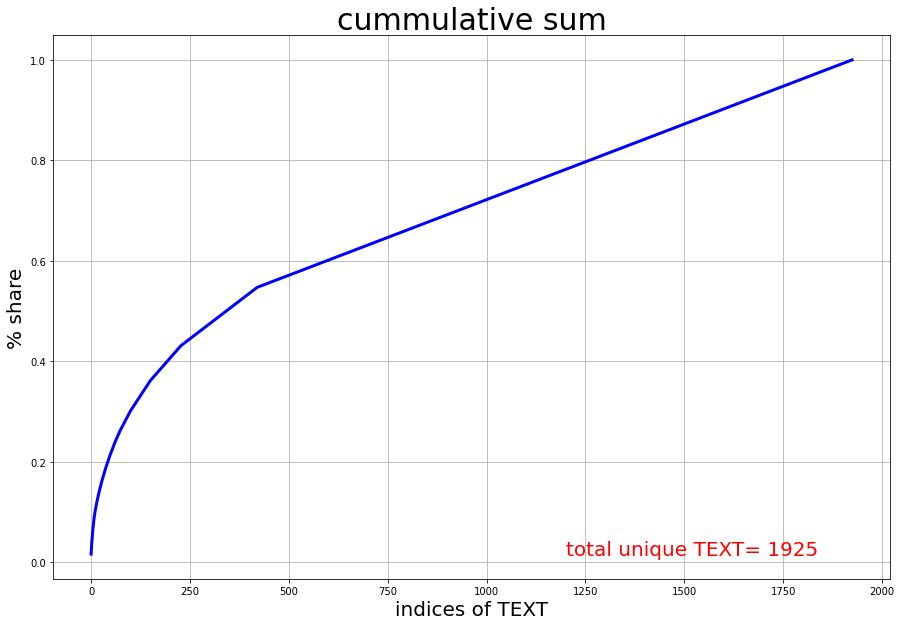

In [34]:
uniq_val_text = result['TEXT'].value_counts()
plt.figure(figsize=(15,10))
plt.plot(uniq_val_text.values / uniq_val_text.sum(),color='blue',linewidth=3)
plt.title('percentage share of TEXT',fontsize=30)
plt.grid(b=True)
plt.xlabel('indices of TEXT',fontsize=20)
plt.ylabel('% share',fontsize=20)
plt.annotate('total unique TEXT= '+str(len(uniq_val_text)),xy=(1200,0.015),fontsize=20,color='red' )
plt.show()

cs = np.cumsum(uniq_val_text.values / uniq_val_text.sum())
plt.figure(figsize=(15,10))
plt.plot(cs,color='blue',linewidth=3)
plt.title('cummulative sum',fontsize=30)
plt.grid(b=True)
plt.xlabel('indices of TEXT',fontsize=20)
plt.ylabel('% share',fontsize=20)
plt.annotate('total unique TEXT= '+str(len(uniq_val_text  )),xy=(1200,0.015),fontsize=20,color='red' )
plt.show()

************************************************** One Hot Encoding **************************************************


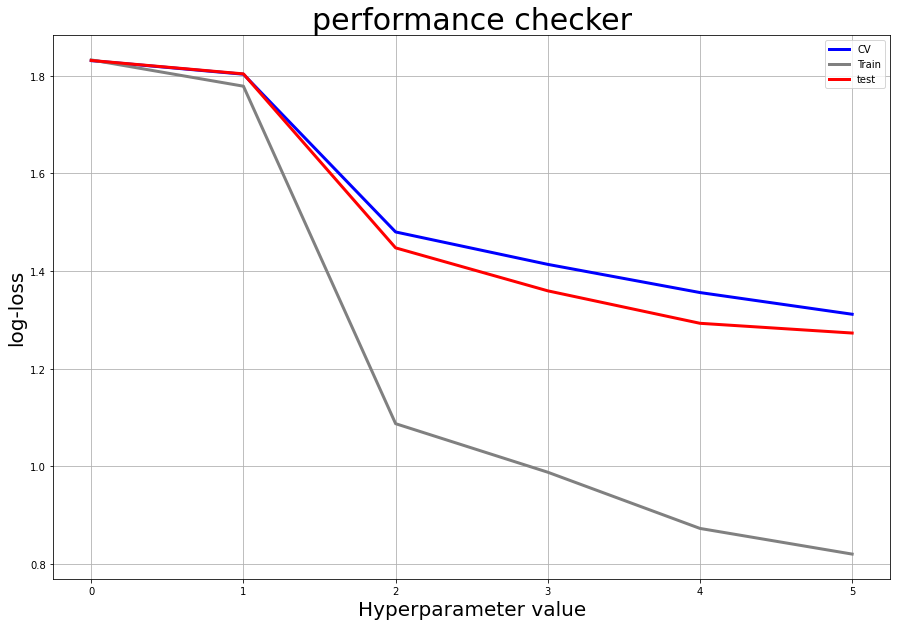

Log loss is train =  1.8323602381926967, test = 1.831206043784792 and cv = 1.8308894970074718 for alpha value 1e-05
Log loss is train =  1.778522342917885, test = 1.8037324486039086 and cv = 1.8030810913887954 for alpha value 0.0001
Log loss is train =  1.0872711899517524, test = 1.4473764905050104 and cv = 1.4799454805908543 for alpha value 0.001
Log loss is train =  0.9878240507179444, test = 1.3593515036698383 and cv = 1.4135554493444424 for alpha value 0.01
Log loss is train =  0.8727161857795495, test = 1.292876703878281 and cv = 1.3558448412366837 for alpha value 0.1
Log loss is train =  0.8201465284371308, test = 1.272924514593642 and cv = 1.3113995153540783 for alpha value 1
************************************************** Response Encoding **************************************************


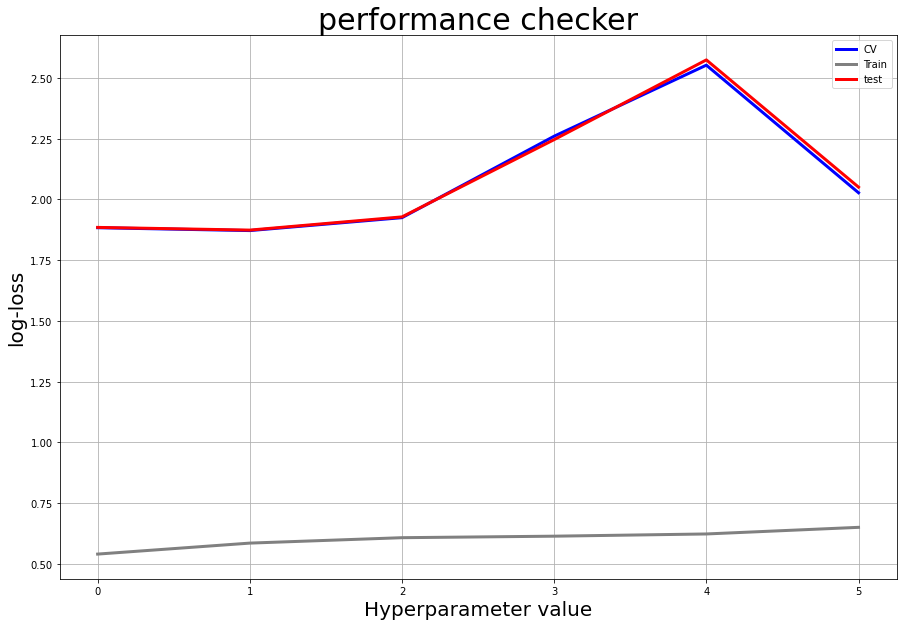

Log loss is train =  0.5403943511011525, test = 1.8850871718433593 and cv = 1.8837827771989322 for alpha value 1e-05
Log loss is train =  0.5855975161735696, test = 1.873986890355329 and cv = 1.8719949363474595 for alpha value 0.0001
Log loss is train =  0.6078974078232199, test = 1.9283447851562243 and cv = 1.9251964870642528 for alpha value 0.001
Log loss is train =  0.6141229143544207, test = 2.2464264258737523 and cv = 2.2604569646362336 for alpha value 0.01
Log loss is train =  0.623245145551306, test = 2.574498310932663 and cv = 2.552873458973297 for alpha value 0.1
Log loss is train =  0.650509589204158, test = 2.0509177372522926 and cv = 2.027713910489454 for alpha value 1
************************************************** TFIDF Encoding **************************************************


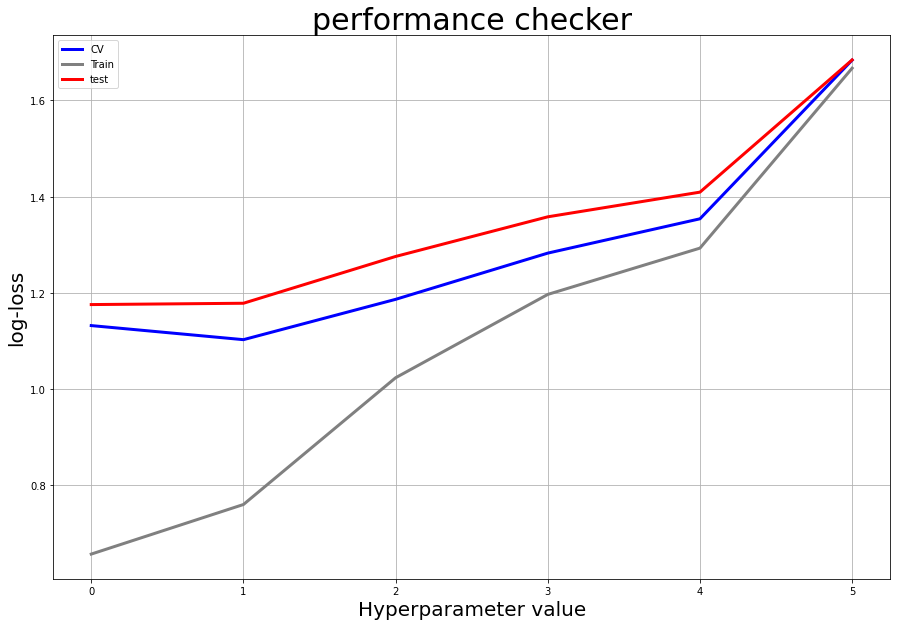

Log loss is train =  0.6575110098780341, test = 1.1758515455540357 and cv = 1.1322015671626933 for alpha value 1e-05
Log loss is train =  0.7605051106259882, test = 1.1785875898133968 and cv = 1.1029480221368861 for alpha value 0.0001
Log loss is train =  1.023830313108937, test = 1.275792166900128 and cv = 1.1867177959280808 for alpha value 0.001
Log loss is train =  1.196954386107334, test = 1.3581530015846883 and cv = 1.2827556455175 for alpha value 0.01
Log loss is train =  1.293121316013453, test = 1.4094114183133357 and cv = 1.3540294509177992 for alpha value 0.1
Log loss is train =  1.66695190528168, test = 1.6841034879830707 and cv = 1.683725670451172 for alpha value 1


In [35]:
print('*'*50,'One Hot Encoding','*'*50)
alpha = [10 ** x for x in range(-5, 1)]
performance(text_one_hot_tr,text_one_hot_test,text_one_hot_cv,Y_tr,Y_test,Y_cv,alpha) 
print('*'*50,'Response Encoding','*'*50)
performance(text_response_tr,text_response_test,text_response_cv,Y_tr,Y_test,Y_cv,alpha) 
print('*'*50,'TFIDF Encoding','*'*50)
performance(text_tfidf_tr,text_tfidf_test,text_tfidf_cv,Y_tr,Y_test,Y_cv,alpha) 

# *# *Conclusion: Best Parameters <br><h5>LOG LOSS:<br>1.Train: Log loss is train = 0.5883048303066178, <br>2.test = 0.6232510119525043 <br>3.cv = 0.631641928096624  <br>4alpha = 1e-05<br>5. Vectorizer: Response Encoding*<br> <h5>TEXT feature is  strongest related to target value than any other was. And we can also see that train loss and cv_loss and test_loss are having very less variance in terms of response encoding. This tells us that this feature is stable across datasets and maintains a good balance between underfitting and overfitting. <br>  So we should definitely keep this feature. *

# *Decision Making: <h5>So from above Univariate analysis of the features we will be doing:<br> 1.GENE: One Hot Encoding<br>2.Variation: Response Encoding<br>3. TEXT: Response Encoding*

# **D. Model Selection**
<h5> Since by now we know that how vectorization on each features has to be done.<br> But we don't know which model to apply. So we will try various model on our vectorized data.


*   Logistic Regression
*   Linear SVM
*   KNN
*   RandomForest

NOTE: As mentioned in the business requirements, we need interpretability of the model, hence we are notconsidering Ensembles as they don't have much of the interpretability. But Logistic and LinearSVM have high level of interpretability So we are testing these two models only. Just to compare we are taking RandomForest also.<br> And to make decision on choosing of models we will use confusion metrics, recall and precision metrics.





# *D.1: Data Preparation*

In [36]:
data_tr = np.hstack((gene_tfidf_tr,var_tfidf_tr,text_tfidf_tr ))
data_test = np.hstack((gene_tfidf_test,var_tfidf_test,text_tfidf_test ))
data_cv = np.hstack((gene_tfidf_cv,var_tfidf_cv,text_tfidf_cv ))
print('train shape:',data_tr.shape)
print('test shape:',data_test.shape)
print('cv shape:',data_cv.shape)

train shape: (2124, 2232)
test shape: (665, 2232)
cv shape: (532, 2232)


# *D.2: Hyperparameter Tuning*

# *Logistic Regression*

In [37]:
alpha = [10 ** x for x in range(-6, 3)] # this is the  lambda value we need to find out by cross validation 
def performance_model(vector_tr,vector_cv,Y_tr,Y_cv,alpha):
  error_cv=[]
  error_tr=[]
  for i in alpha:
      clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
      clf.fit(vector_tr, Y_tr)
      sig_clf = CalibratedClassifierCV(clf, method="sigmoid") # we want our predicted value to be a probability for the interpretability hence we are using CalibratedClassifierCV
      sig_clf.fit(vector_tr,Y_tr)
      predict_y_tr = sig_clf.predict_proba(vector_tr)
      predict_y = sig_clf.predict_proba(vector_cv)
      error_cv.append(log_loss(Y_cv, predict_y, labels=clf.classes_, eps=1e-15))
      error_tr.append(log_loss(Y_tr, predict_y_tr, labels=clf.classes_, eps=1e-15)) 
  plt.figure(figsize=(15,10))
  plt.plot(error_cv,color='blue',linewidth=3)
  plt.plot(error_tr,color='grey',linewidth=3)
  plt.title('performance checker',fontsize=30)
  plt.grid(b=True)
  plt.legend(['CV','Train'])
  plt.xlabel('Hyperparameter value',fontsize=20)
  plt.ylabel('log-loss',fontsize=20)
  #for i,j in zip(alpha,error_cv):
      #plt.annotate(str(round(j,2)),xy=(i,j),fontsize=20,color='grey' )
  plt.show()
  for i in (range(len(alpha))):
    print('Log loss is train =  {0} and cv = {1} for alpha value {2}'.format(error_tr[i],error_cv[i],alpha[i] )) 
 

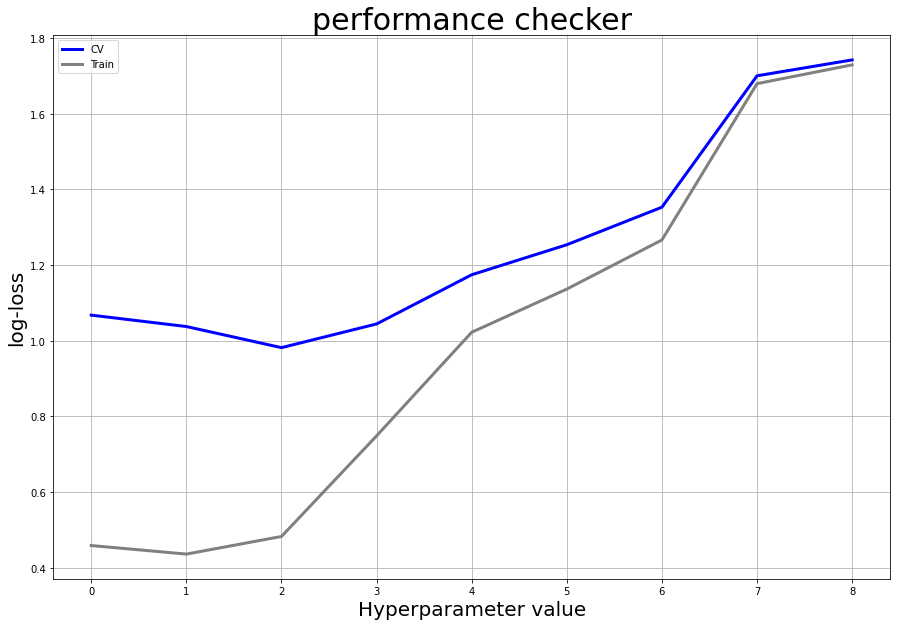

Log loss is train =  0.45889194366502634 and cv = 1.0675927857932896 for alpha value 1e-06
Log loss is train =  0.4363292897740799 and cv = 1.037482796547228 for alpha value 1e-05
Log loss is train =  0.48287171768276715 and cv = 0.9816896108016526 for alpha value 0.0001
Log loss is train =  0.7486585782680991 and cv = 1.0442783362640118 for alpha value 0.001
Log loss is train =  1.022318261673957 and cv = 1.1742448291452947 for alpha value 0.01
Log loss is train =  1.1364528926967892 and cv = 1.253555477010101 for alpha value 0.1
Log loss is train =  1.2661351450429121 and cv = 1.3527206984870808 for alpha value 1
Log loss is train =  1.6791476486792323 and cv = 1.699866910808125 for alpha value 10
Log loss is train =  1.7287465747180735 and cv = 1.7418254673002278 for alpha value 100


In [38]:
performance_model(data_tr,data_cv,Y_tr,Y_cv,alpha)

Best model = Log loss is train =  1.004839020557088 and cv = 1.2158399073823039 for alpha value 0.001

In [39]:

# Now that we know our best model on whole dataset, we will train our model with best alpha value

def log_loss_and_confusion_matrix(data_tr, Y_tr,data_test, Y_test, model):
    model.fit(data_tr, Y_tr)
    sig_clf = CalibratedClassifierCV(model, method="sigmoid")
    sig_clf.fit(data_tr, Y_tr)
    pred_y = sig_clf.predict(data_test)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(Y_test, sig_clf.predict_proba(data_test)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- Y_test))/Y_test.shape[0])
    plot_confusion_matrix(Y_test, pred_y)
    return pred_y 

Log loss : 1.0511141303199667
Number of mis-classified points : 0.3684210526315789
-------------------- Confusion matrix --------------------


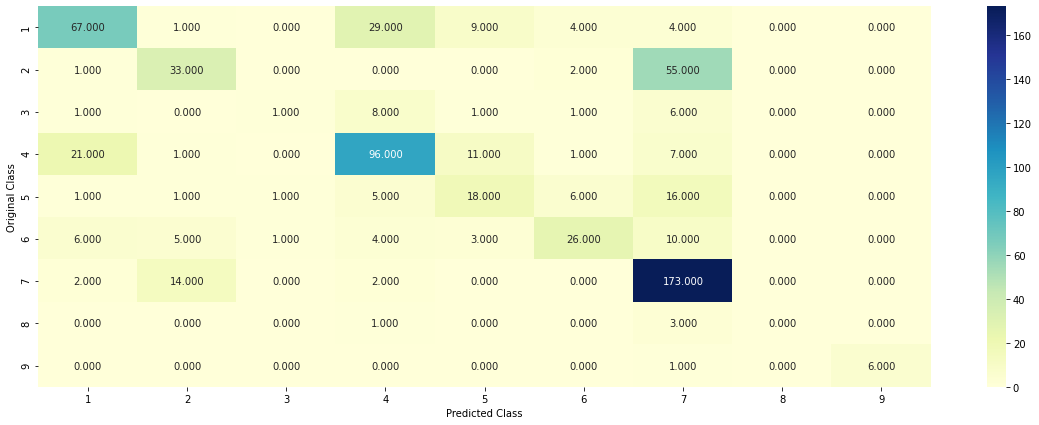

-------------------- Precision matrix (Columm Sum=1) --------------------


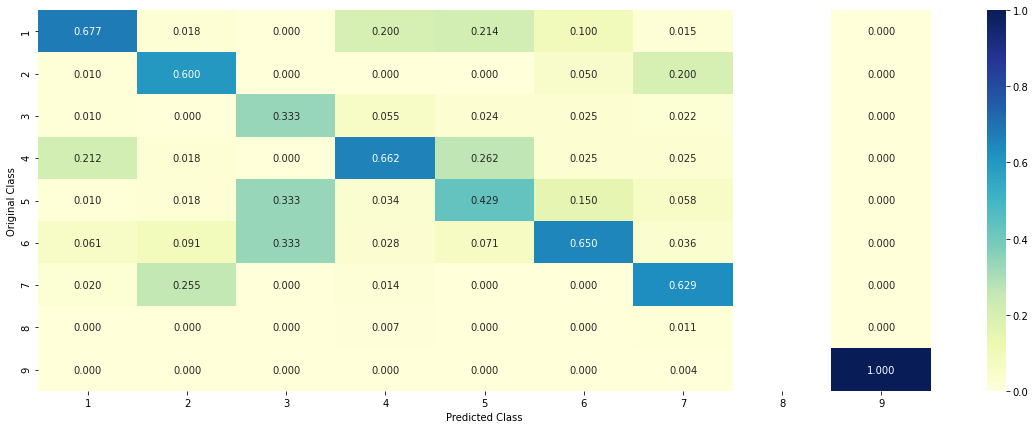

-------------------- Recall matrix (Row sum=1) --------------------


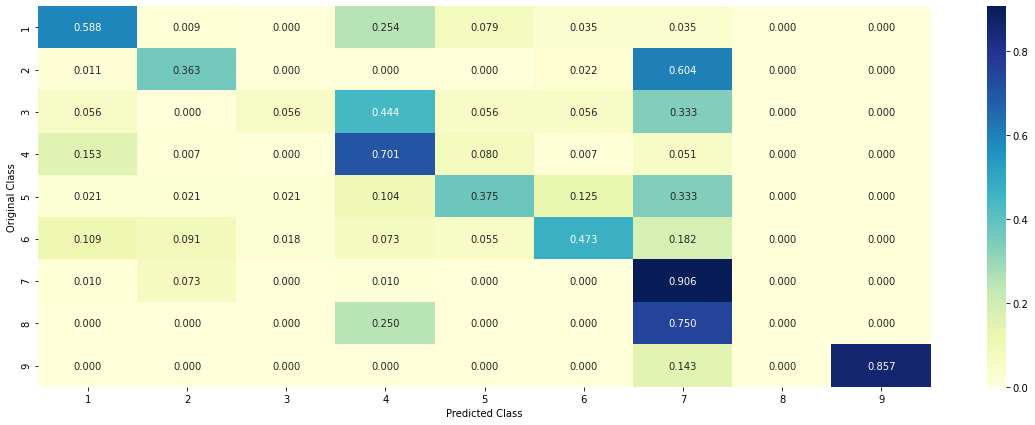

array([4, 7, 1, 7, 7, 7, 7, 6, 9, 7, 7, 4, 1, 7, 1, 7, 7, 7, 4, 4, 7, 7,
       2, 9, 7, 1, 1, 1, 7, 4, 2, 4, 7, 7, 1, 2, 7, 7, 7, 7, 1, 7, 4, 6,
       1, 4, 1, 7, 4, 7, 7, 7, 4, 4, 5, 7, 2, 1, 5, 7, 1, 4, 7, 7, 4, 4,
       4, 5, 7, 7, 7, 4, 4, 7, 1, 4, 4, 7, 4, 7, 5, 4, 5, 1, 7, 4, 1, 6,
       4, 7, 7, 7, 7, 4, 5, 2, 7, 7, 7, 4, 7, 7, 7, 7, 7, 7, 7, 4, 7, 7,
       5, 7, 7, 7, 1, 7, 4, 4, 4, 1, 7, 1, 5, 1, 1, 6, 7, 1, 7, 7, 1, 1,
       4, 7, 2, 7, 1, 7, 7, 7, 7, 2, 7, 2, 4, 5, 7, 7, 7, 7, 5, 1, 7, 2,
       4, 9, 5, 7, 7, 7, 1, 7, 5, 1, 1, 6, 7, 4, 7, 1, 4, 7, 4, 7, 4, 7,
       2, 7, 1, 2, 7, 1, 7, 4, 1, 1, 6, 1, 4, 1, 1, 2, 7, 2, 7, 7, 6, 1,
       2, 1, 2, 3, 7, 4, 4, 4, 4, 7, 7, 2, 2, 4, 7, 6, 6, 7, 4, 1, 7, 7,
       2, 7, 1, 2, 7, 7, 1, 7, 7, 7, 2, 7, 7, 7, 1, 5, 7, 4, 4, 1, 4, 7,
       4, 7, 7, 7, 1, 4, 7, 7, 7, 7, 6, 1, 4, 6, 5, 4, 1, 4, 7, 2, 5, 7,
       6, 7, 7, 1, 4, 7, 2, 7, 1, 4, 7, 4, 7, 7, 1, 4, 7, 2, 7, 7, 5, 1,
       7, 4, 4, 7, 7, 4, 2, 4, 4, 4, 1, 7, 6, 7, 1,

In [68]:
from sklearn.metrics import log_loss
model_lr = SGDClassifier(loss='log',penalty='l2',alpha=0.001)
log_loss_and_confusion_matrix(data_tr, Y_tr,data_test, Y_test, model)

# *LinearSVM*

In [41]:
def performance_model_hinge(vector_tr,vector_cv,Y_tr,Y_cv,alpha):
  error_cv=[]
  error_tr=[]
  for i in alpha:
      clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
      clf.fit(vector_tr, Y_tr)
      sig_clf = CalibratedClassifierCV(clf, method="sigmoid") # we want our predicted value to be a probability for the interpretability hence we are using CalibratedClassifierCV
      sig_clf.fit(vector_tr,Y_tr)
      predict_y_tr = sig_clf.predict_proba(vector_tr)
      predict_y = sig_clf.predict_proba(vector_cv)
      error_cv.append(log_loss(Y_cv, predict_y, labels=clf.classes_, eps=1e-15))
      error_tr.append(log_loss(Y_tr, predict_y_tr, labels=clf.classes_, eps=1e-15)) 
  plt.figure(figsize=(15,10))
  plt.plot(error_cv,color='blue',linewidth=3)
  plt.plot(error_tr,color='grey',linewidth=3)
  plt.title('performance checker',fontsize=30)
  plt.grid(b=True)
  plt.legend(['CV','Train'])
  plt.xlabel('Hyperparameter value',fontsize=20)
  plt.ylabel('log-loss',fontsize=20)
  #for i,j in zip(alpha,error_cv):
      #plt.annotate(str(round(j,2)),xy=(i,j),fontsize=20,color='grey' )
  plt.show()
  for i in (range(len(alpha))):
    print('Log loss is train =  {0} and cv = {1} for alpha value {2}'.format(error_tr[i],error_cv[i],alpha[i] )) 
 

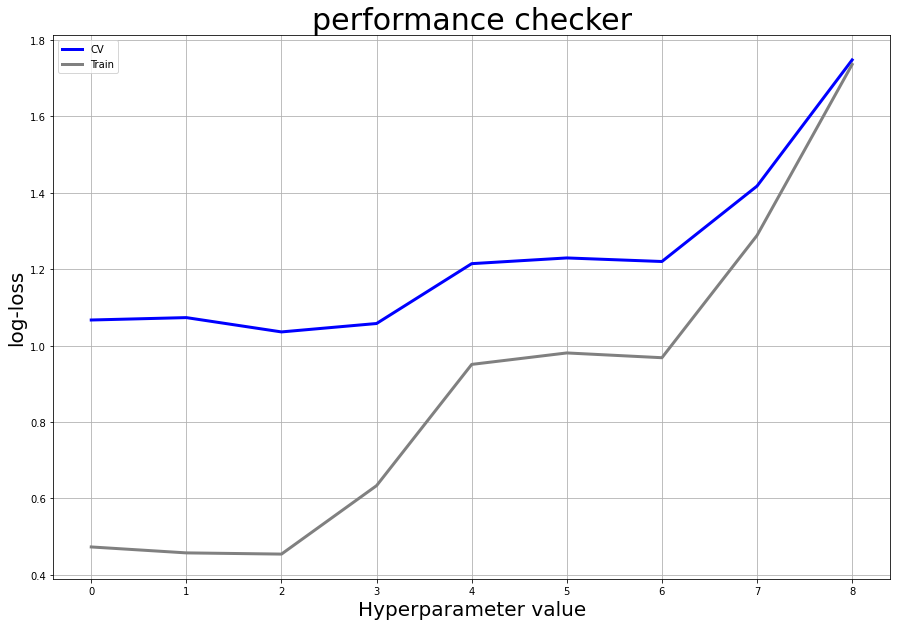

Log loss is train =  0.47319496134912886 and cv = 1.066887551580956 for alpha value 1e-06
Log loss is train =  0.4576635496402124 and cv = 1.0731535431115167 for alpha value 1e-05
Log loss is train =  0.45451754902155084 and cv = 1.0357156984417457 for alpha value 0.0001
Log loss is train =  0.6335998081222384 and cv = 1.057721228006648 for alpha value 0.001
Log loss is train =  0.9507375373620717 and cv = 1.2142855326300457 for alpha value 0.01
Log loss is train =  0.9807246430149223 and cv = 1.2292437032873786 for alpha value 0.1
Log loss is train =  0.9682264619445591 and cv = 1.2199020057081724 for alpha value 1
Log loss is train =  1.2881917513308596 and cv = 1.4172534818343319 for alpha value 10
Log loss is train =  1.7354112484039281 and cv = 1.7472840295487202 for alpha value 100


In [42]:
performance_model_hinge(data_tr,data_cv,Y_tr,Y_cv,alpha)

Best Model()

Log loss : 1.2216076580239779
Number of mis-classified points : 0.3819548872180451
-------------------- Confusion matrix --------------------


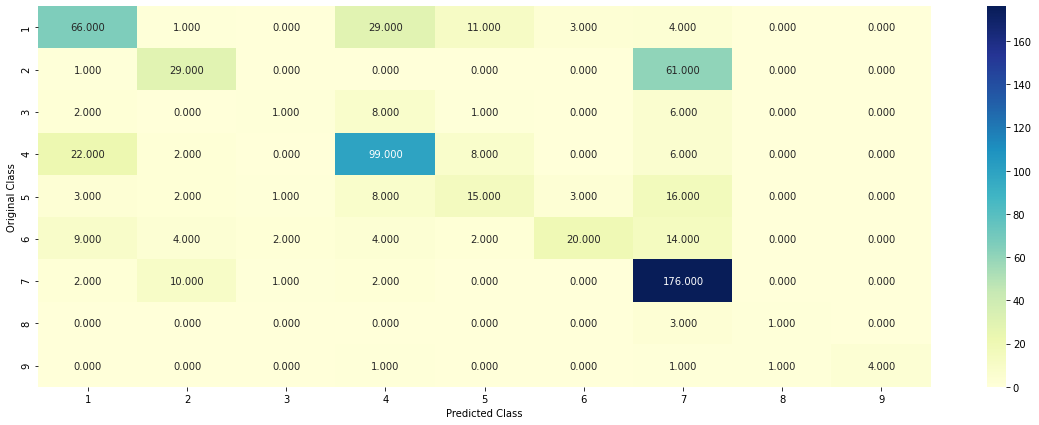

-------------------- Precision matrix (Columm Sum=1) --------------------


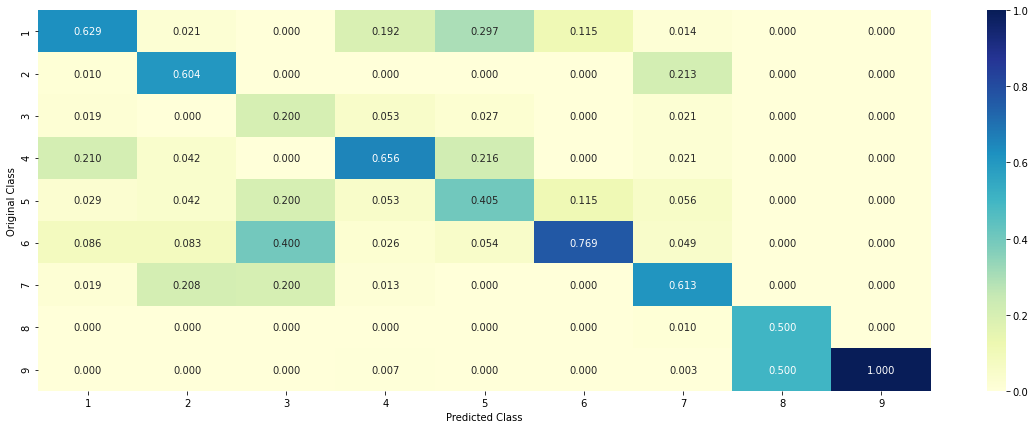

-------------------- Recall matrix (Row sum=1) --------------------


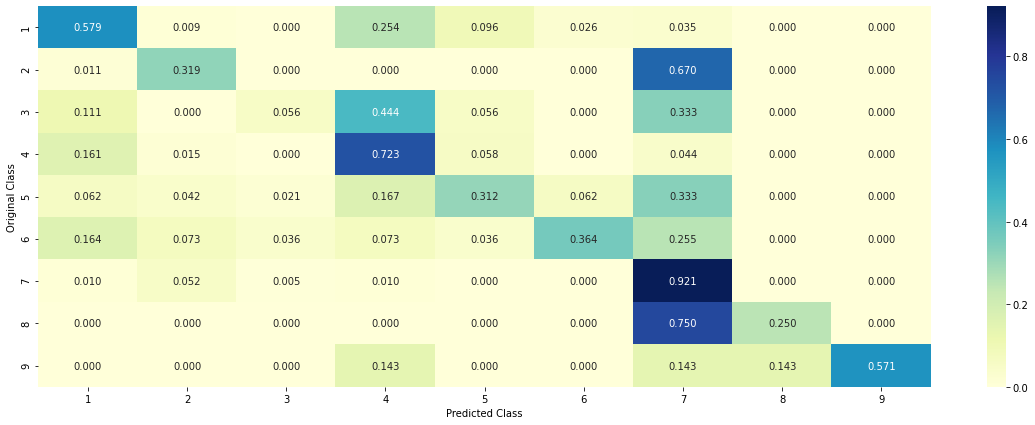

array([4, 7, 1, 7, 7, 7, 7, 6, 9, 8, 7, 4, 1, 7, 1, 7, 7, 7, 4, 4, 7, 7,
       2, 4, 7, 1, 1, 1, 7, 4, 2, 4, 7, 7, 1, 7, 7, 7, 7, 7, 1, 7, 4, 4,
       1, 4, 1, 7, 4, 7, 7, 7, 4, 8, 5, 7, 7, 1, 5, 7, 1, 4, 7, 7, 4, 4,
       4, 5, 7, 7, 7, 4, 4, 7, 1, 4, 1, 7, 4, 7, 4, 4, 5, 1, 7, 4, 1, 6,
       4, 7, 7, 7, 7, 4, 5, 2, 7, 7, 7, 4, 7, 7, 7, 2, 7, 7, 7, 4, 7, 7,
       5, 7, 7, 7, 1, 7, 4, 4, 4, 1, 7, 1, 5, 1, 1, 4, 7, 1, 7, 7, 1, 1,
       4, 7, 2, 7, 1, 7, 7, 7, 7, 7, 7, 2, 4, 5, 7, 7, 7, 3, 4, 1, 7, 2,
       4, 9, 5, 7, 7, 7, 1, 7, 5, 1, 1, 6, 7, 4, 7, 1, 4, 7, 4, 7, 4, 7,
       2, 7, 1, 2, 7, 1, 7, 4, 1, 1, 6, 1, 4, 1, 1, 2, 7, 2, 7, 7, 6, 1,
       2, 1, 2, 3, 7, 4, 4, 4, 5, 7, 7, 2, 7, 4, 7, 6, 1, 7, 3, 1, 7, 7,
       2, 7, 1, 2, 7, 7, 1, 7, 7, 7, 2, 7, 7, 7, 1, 5, 7, 4, 4, 1, 4, 7,
       4, 7, 7, 7, 1, 4, 7, 7, 7, 7, 6, 1, 2, 7, 5, 4, 1, 4, 7, 2, 4, 7,
       6, 7, 7, 1, 4, 7, 2, 7, 1, 4, 7, 4, 7, 7, 1, 4, 7, 2, 7, 7, 4, 5,
       7, 4, 4, 7, 7, 5, 2, 4, 4, 4, 1, 7, 6, 7, 1,

In [43]:
model = SGDClassifier(loss='hinge',penalty='l2',alpha=0.01)
log_loss_and_confusion_matrix(data_tr, Y_tr,data_test, Y_test, model)

# *D.3: KNN*

In [44]:
k = [1,3,5,7,9,11,13,15,17]
def performance_knn(vector_tr,vector_cv,Y_tr,Y_cv,alpha):
  from sklearn.neighbors import KNeighborsClassifier
  error_cv=[]
  error_tr=[]
  for i in alpha:
      clf = KNeighborsClassifier(n_neighbors=i)
      clf.fit(vector_tr, Y_tr)
      sig_clf = CalibratedClassifierCV(clf, method="sigmoid") # we want our predicted value to be a probability for the interpretability hence we are using CalibratedClassifierCV
      sig_clf.fit(vector_tr,Y_tr)
      predict_y_tr = sig_clf.predict_proba(vector_tr)
      predict_y = sig_clf.predict_proba(vector_cv)
      error_cv.append(log_loss(Y_cv, predict_y, labels=clf.classes_, eps=1e-15))
      error_tr.append(log_loss(Y_tr, predict_y_tr, labels=clf.classes_, eps=1e-15)) 
  plt.figure(figsize=(15,10))
  plt.plot(error_cv,color='blue',linewidth=3)
  plt.plot(error_tr,color='grey',linewidth=3)
  plt.title('performance checker',fontsize=30)
  plt.grid(b=True)
  plt.legend(['CV','Train'])
  plt.xlabel('Hyperparameter value',fontsize=20)
  plt.ylabel('log-loss',fontsize=20)
  #for i,j in zip(alpha,error_cv):
      #plt.annotate(str(round(j,2)),xy=(i,j),fontsize=20,color='grey' )
  plt.show()
  for i in (range(len(alpha))):
    print('Log loss is train =  {0} and cv = {1} for alpha value {2}'.format(error_tr[i],error_cv[i],alpha[i] )) 

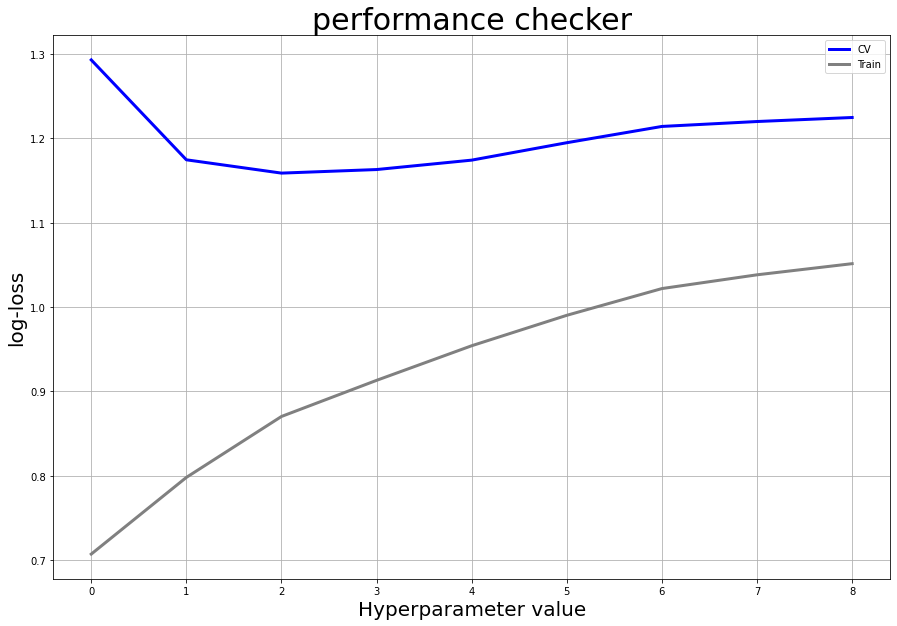

Log loss is train =  0.7070989896916183 and cv = 1.2931930620501169 for alpha value 1
Log loss is train =  0.7980349819271066 and cv = 1.1747202829321752 for alpha value 3
Log loss is train =  0.870313806538547 and cv = 1.1589345822659032 for alpha value 5
Log loss is train =  0.9131559014214107 and cv = 1.1631632537765753 for alpha value 7
Log loss is train =  0.9541965709531557 and cv = 1.174331384510584 for alpha value 9
Log loss is train =  0.9902996582790495 and cv = 1.1949930051319737 for alpha value 11
Log loss is train =  1.0220079420184192 and cv = 1.214287442893771 for alpha value 13
Log loss is train =  1.038326297675227 and cv = 1.2201227924078712 for alpha value 15
Log loss is train =  1.0515421625030101 and cv = 1.2248950961485976 for alpha value 17


In [45]:
performance_knn(data_tr,data_cv,Y_tr,Y_cv,k)

Log loss : 1.162549270127746
Number of mis-classified points : 0.4195488721804511
-------------------- Confusion matrix --------------------


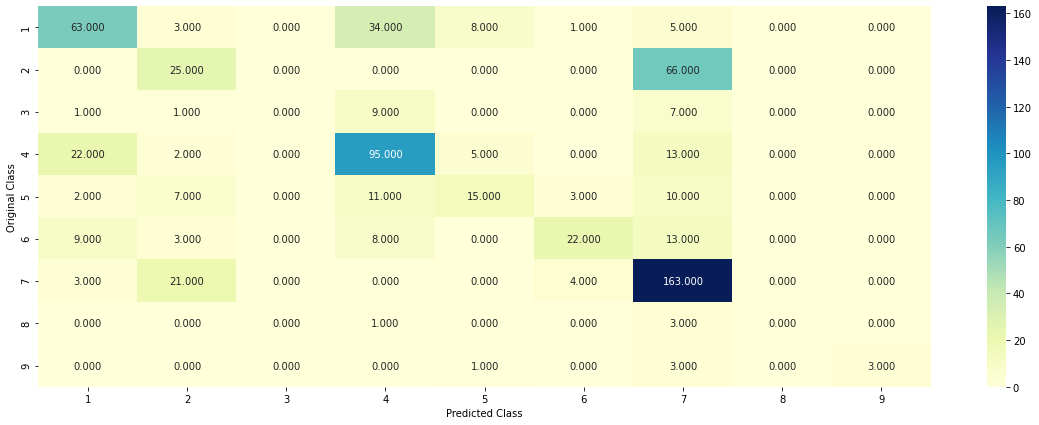

-------------------- Precision matrix (Columm Sum=1) --------------------


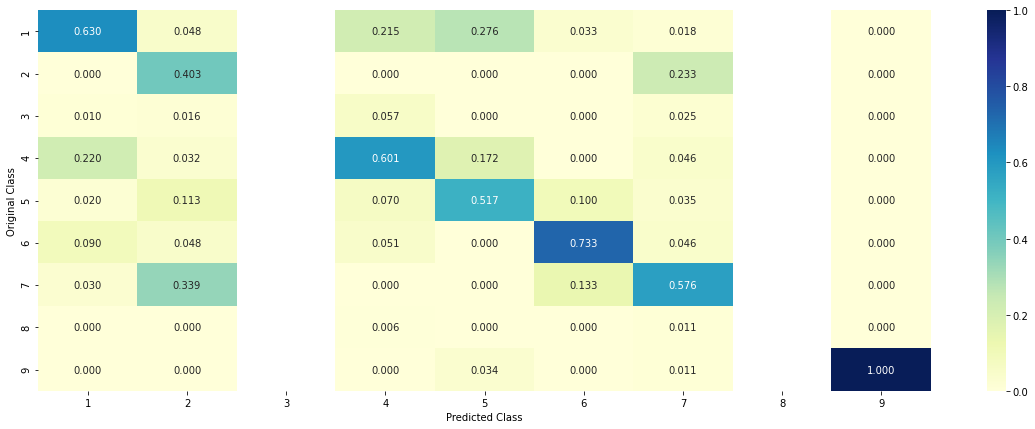

-------------------- Recall matrix (Row sum=1) --------------------


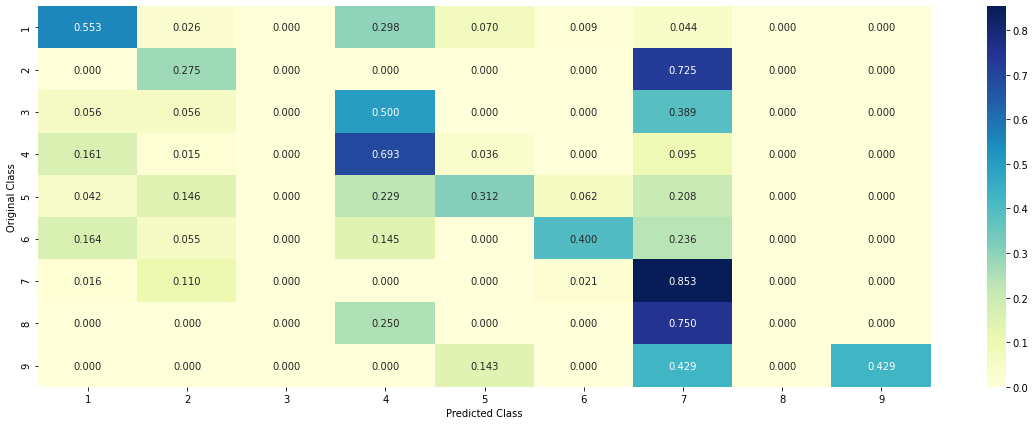

array([4, 7, 1, 7, 7, 7, 7, 6, 7, 7, 7, 4, 1, 7, 1, 7, 7, 7, 1, 4, 7, 2,
       7, 5, 7, 1, 1, 1, 7, 4, 7, 4, 7, 7, 1, 7, 7, 7, 7, 2, 1, 7, 4, 4,
       1, 4, 4, 7, 4, 7, 7, 7, 4, 4, 5, 7, 7, 1, 4, 1, 1, 7, 7, 2, 4, 4,
       4, 4, 2, 7, 2, 4, 4, 7, 2, 4, 1, 7, 4, 7, 1, 4, 5, 1, 7, 7, 1, 5,
       4, 7, 7, 7, 2, 4, 5, 2, 7, 7, 7, 4, 7, 7, 7, 7, 7, 7, 7, 4, 7, 7,
       5, 7, 7, 7, 1, 7, 4, 4, 4, 1, 7, 1, 5, 1, 1, 4, 7, 1, 7, 7, 1, 1,
       4, 7, 2, 7, 4, 7, 7, 7, 7, 7, 7, 7, 4, 5, 7, 7, 7, 7, 4, 1, 7, 7,
       4, 9, 4, 7, 7, 7, 1, 7, 4, 1, 1, 5, 7, 4, 7, 1, 4, 7, 4, 7, 4, 7,
       2, 2, 1, 7, 7, 1, 2, 4, 1, 1, 6, 1, 4, 1, 1, 2, 2, 7, 7, 7, 5, 1,
       7, 1, 2, 4, 7, 4, 4, 4, 7, 7, 7, 2, 7, 4, 7, 6, 1, 7, 4, 1, 7, 7,
       2, 7, 1, 2, 7, 7, 1, 7, 6, 7, 7, 7, 7, 7, 1, 5, 7, 4, 4, 1, 7, 7,
       4, 7, 7, 7, 1, 4, 7, 7, 7, 7, 6, 1, 4, 7, 4, 4, 1, 4, 7, 2, 4, 2,
       6, 2, 7, 1, 4, 2, 2, 7, 1, 4, 7, 4, 7, 1, 1, 4, 7, 2, 7, 7, 4, 1,
       7, 4, 4, 7, 7, 5, 2, 4, 4, 4, 1, 7, 6, 7, 1,

In [46]:
model = KNeighborsClassifier(n_neighbors=11)
log_loss_and_confusion_matrix(data_tr, Y_tr,data_test, Y_test, model)

# *Conclusions: Surprisingly KNN is performing alot better than LinearSVM and Logistic Regression. The difference of missclassification is almost 20 %. So for now our model is KNN with n_neighbors=17, Why?, because less than 17 we will overfit the data.*

# *D.4: RandomForest*

In [47]:
def performance_rf(vector_tr,vector_cv,Y_tr,Y_cv,alpha):
  from sklearn.ensemble import RandomForestClassifier
  for l in [5,10]:
    error_cv=[]
    error_tr=[]
    for i in alpha:
        clf = RandomForestClassifier(n_estimators=i,criterion='gini',max_depth=l)
        clf.fit(vector_tr, Y_tr)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid") # we want our predicted value to be a probability for the interpretability hence we are using CalibratedClassifierCV
        sig_clf.fit(vector_tr,Y_tr)
        predict_y_tr = sig_clf.predict_proba(vector_tr)
        predict_y = sig_clf.predict_proba(vector_cv)
        error_cv.append(log_loss(Y_cv, predict_y, labels=clf.classes_, eps=1e-15))
        error_tr.append(log_loss(Y_tr, predict_y_tr, labels=clf.classes_, eps=1e-15)) 
    plt.figure(figsize=(15,10))
    plt.plot(error_cv,color='blue',linewidth=3)
    plt.plot(error_tr,color='grey',linewidth=3)
    plt.title('performance checker max_depth='+str(l),fontsize=30)
    plt.grid(b=True)
    plt.legend(['CV','Train'])
    plt.xlabel('Hyperparameter value',fontsize=20)
    plt.ylabel('log-loss',fontsize=20)
    #for i,j in zip(alpha,error_cv):
        #plt.annotate(str(round(j,2)),xy=(i,j),fontsize=20,color='grey' )
    plt.show()
    for i in (range(len(alpha))):
      print('Log loss is train =  {0} and cv = {1} for alpha value {2}'.format(error_tr[i],error_cv[i],alpha[i] )) 

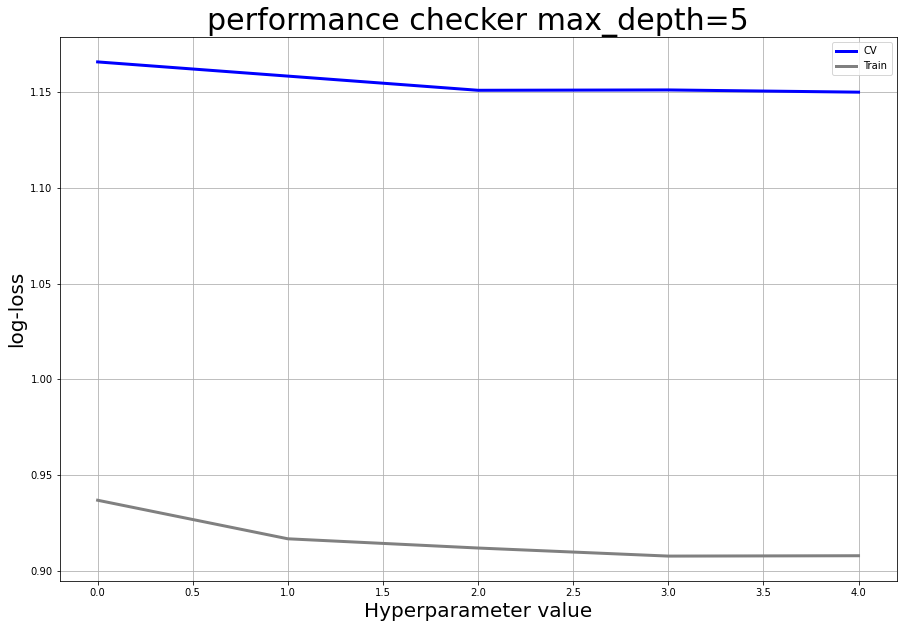

Log loss is train =  0.9369116725745348 and cv = 1.1656287515259387 for alpha value 100
Log loss is train =  0.9167888269369671 and cv = 1.1582225759692786 for alpha value 200
Log loss is train =  0.9119709146408262 and cv = 1.1508229283968507 for alpha value 500
Log loss is train =  0.9077621332926012 and cv = 1.1510053217384324 for alpha value 1000
Log loss is train =  0.9079507931470374 and cv = 1.149843324969958 for alpha value 2000


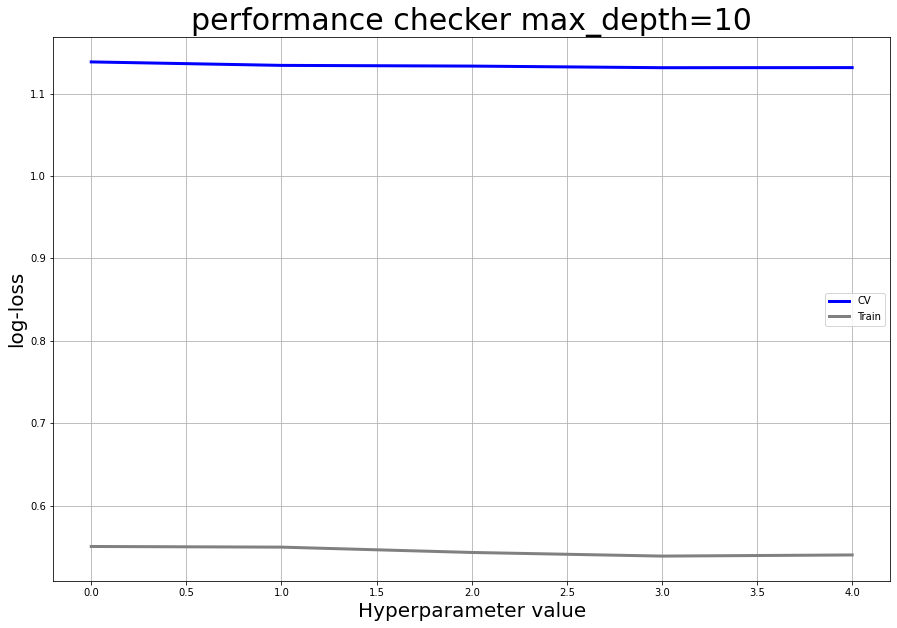

Log loss is train =  0.5504839958150273 and cv = 1.1384213749693108 for alpha value 100
Log loss is train =  0.549693388132415 and cv = 1.134207745858469 for alpha value 200
Log loss is train =  0.5432305313111145 and cv = 1.1333544828209436 for alpha value 500
Log loss is train =  0.5388262079501093 and cv = 1.1313950079647408 for alpha value 1000
Log loss is train =  0.5402042047280808 and cv = 1.1315104094585273 for alpha value 2000


In [48]:
alpha = [100,200,500,1000,2000]
performance_rf(data_tr,data_cv,Y_tr,Y_cv,alpha)

# *New Champion: Log loss is train = 0.042215236506519184 and cv =0.043400622396396825 for alpha value 200 and max_depth=5*

Log loss : 1.2517024697546932
Number of mis-classified points : 0.42255639097744363
-------------------- Confusion matrix --------------------


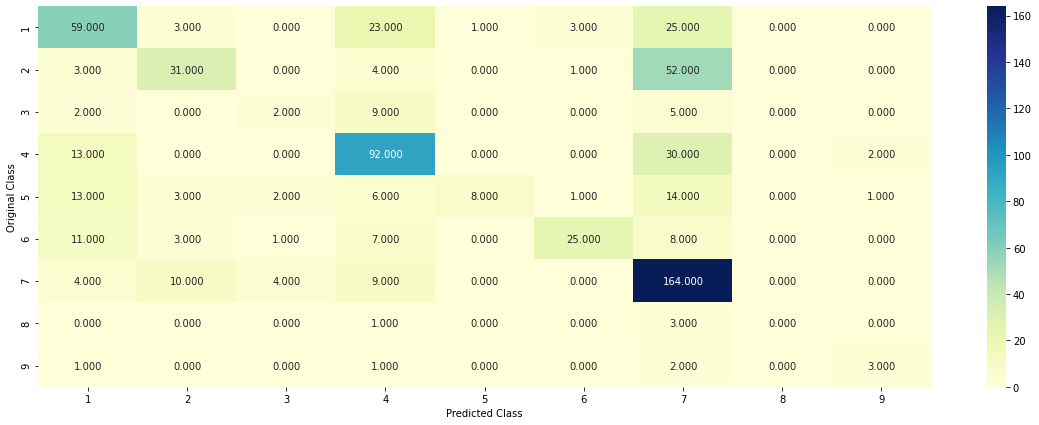

-------------------- Precision matrix (Columm Sum=1) --------------------


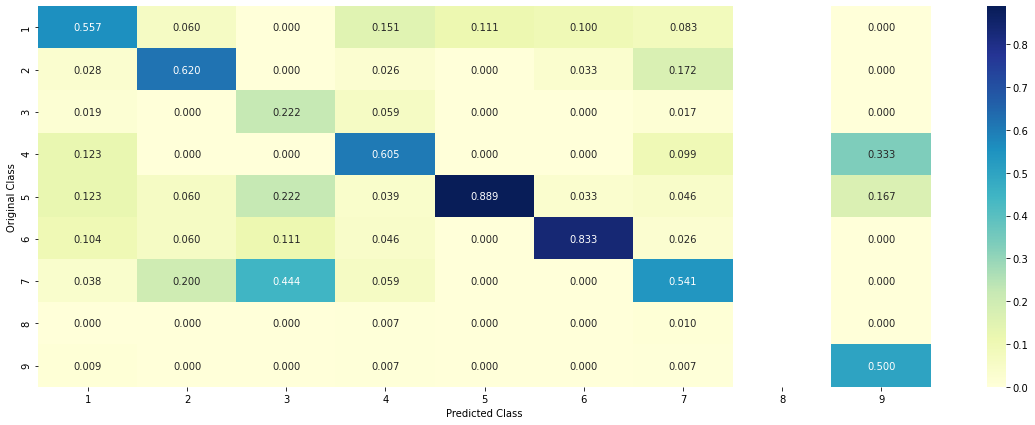

-------------------- Recall matrix (Row sum=1) --------------------


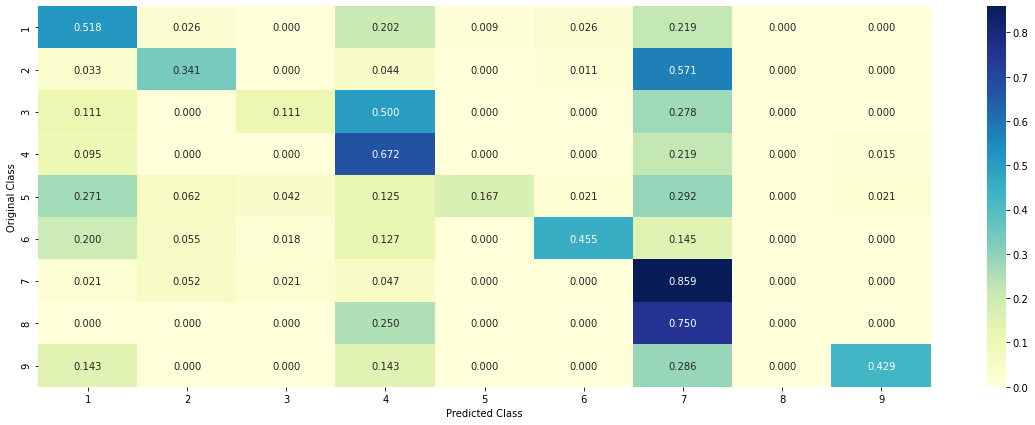

In [49]:
model = RandomForestClassifier(n_estimators=200,criterion='gini',max_depth=5)
prediction_test=log_loss_and_confusion_matrix(data_tr, Y_tr,data_test, Y_test, model)

# *Conclusion: RandomForest is working like magical. But the problem with RandomForest is it is not interpretable. So we can't use this.*

In [50]:
actual_test_var_data=pd.read_csv('/content/drive/My Drive/Cancer_Diagnosys/stage2_test_variants.csv')
actual_test_text_data=pd.read_csv("/content/drive/My Drive/Cancer_Diagnosys/test_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)

In [51]:
actual_test_text_data.head()

ID                                               TEXT
0   0  2. This mutation resulted in a myeloproliferat...
1   1   Abstract The Large Tumor Suppressor 1 (LATS1)...
2   2  Vascular endothelial growth factor receptor (V...
3   3  Inflammatory myofibroblastic tumor (IMT) is a ...
4   4   Abstract Retinoblastoma is a pediatric retina...

In [52]:
actual_test_var_data.head()

ID    Gene             Variation
0   1   CHEK2                 H371Y
1   2   AXIN2  Truncating Mutations
2   3    WNT4                 E216G
3   4  SUCLA2                 G118R
4   5    BRAF             T599insTT

In [53]:
merged_data = pd.merge(actual_test_var_data,actual_test_text_data, on='ID',how='left')
merged_data.head()

ID  ...                                               TEXT
0   1  ...   Abstract The Large Tumor Suppressor 1 (LATS1)...
1   2  ...  Vascular endothelial growth factor receptor (V...
2   3  ...  Inflammatory myofibroblastic tumor (IMT) is a ...
3   4  ...   Abstract Retinoblastoma is a pediatric retina...
4   5  ...  The accurate determination of perfluoroalkyl s...

[5 rows x 4 columns]

In [54]:
import nltk
nltk.download('stopwords')
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string

     

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
#text processing stage.
start_time = time.clock()
for index, row in actual_test_text_data.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")   

there is no text description for id: 1623
Time took for preprocessing the text : 47.549715999999535 seconds


In [56]:
#actual_result = pd.merge(actual_test_var_data,actual_test_text_data,on='ID',how='left')
merged_data.loc[merged_data['TEXT'].isnull(),'TEXT'] = merged_data['Gene'] +' '+merged_data['Variation']

In [57]:
merged_data.head()

ID  ...                                               TEXT
0   1  ...   Abstract The Large Tumor Suppressor 1 (LATS1)...
1   2  ...  Vascular endothelial growth factor receptor (V...
2   3  ...  Inflammatory myofibroblastic tumor (IMT) is a ...
3   4  ...   Abstract Retinoblastoma is a pediatric retina...
4   5  ...  The accurate determination of perfluoroalkyl s...

[5 rows x 4 columns]

In [59]:
gene_vec = tfidf_vectorizer(X_tr['Gene'],merged_data['Gene'])
var_vec = tfidf_vectorizer(X_tr['Variation'], merged_data['Variation'])
text_vec = tfidf_vectorizer(X_tr['TEXT'], merged_data['TEXT'])

In [62]:
actual_vectorized_data = np.hstack((gene_vec,var_vec,text_vec))

In [63]:
actual_vectorized_data.shape

(986, 2232)

In [82]:
model_lr=SGDClassifier(loss='log',penalty='l2',alpha=0.001,class_weight='balanced')
model_lr.fit(data_tr,Y_tr)
actual_predictions = model_lr.predict(actual_vectorized_data)
actual_predictions_proba = model_lr.predict_proba(actual_vectorized_data)

In [83]:
actual_predictions

array([4, 7, 7, 7, 2, 3, 7, 2, 7, 8, 7, 2, 6, 7, 7, 1, 7, 7, 7, 2, 7, 4,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 2, 2, 7, 4, 7,
       7, 7, 7, 2, 2, 7, 7, 6, 7, 7, 7, 7, 4, 4, 7, 6, 4, 2, 7, 4, 6, 2,
       8, 8, 7, 4, 7, 1, 7, 7, 3, 7, 1, 4, 5, 2, 7, 4, 7, 7, 7, 2, 7, 7,
       7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 7, 2, 7, 7, 1, 7, 7, 7, 4, 7, 7, 7,
       7, 7, 7, 4, 7, 7, 2, 1, 2, 4, 1, 2, 7, 4, 7, 7, 7, 7, 8, 2, 7, 4,
       2, 7, 7, 7, 4, 7, 4, 7, 7, 2, 4, 4, 7, 2, 4, 7, 7, 7, 7, 5, 7, 4,
       7, 7, 7, 7, 2, 2, 7, 7, 7, 7, 1, 7, 2, 7, 1, 7, 7, 2, 1, 4, 2, 7,
       4, 4, 7, 7, 7, 7, 2, 2, 2, 4, 7, 2, 7, 7, 7, 4, 7, 7, 7, 4, 1, 1,
       7, 7, 7, 7, 7, 2, 6, 2, 4, 7, 4, 7, 7, 4, 2, 7, 2, 7, 2, 7, 2, 7,
       7, 7, 4, 7, 7, 4, 7, 7, 1, 7, 7, 3, 7, 3, 6, 6, 4, 7, 2, 4, 2, 4,
       7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 1, 4, 7, 2, 7, 7, 7, 7, 7, 5,
       5, 7, 7, 4, 7, 7, 6, 2, 7, 7, 7, 7, 4, 1, 7, 7, 7, 7, 4, 4, 7, 4,
       2, 7, 7, 7, 2, 4, 7, 7, 2, 7, 7, 7, 4, 7, 1,

In [84]:
actual_predictions.shape

(986,)

In [85]:
actual_predictions_proba[1]

array([0.08368925, 0.14521658, 0.07837877, 0.13302766, 0.06634197,
       0.05722794, 0.2976982 , 0.08758445, 0.05083519])

In [ ]:
out_dic = {
            'ID':list(range(len(actual_predictions))),'class1':list(range(len(actual_predictions))),'class2':list(range(len(actual_predictions))),'class3':list(range(len(actual_predictions))),
            'class4':list(range(len(actual_predictions))),'class5':list(range(len(actual_predictions))),'class6':list(range(len(actual_predictions))),'class7':list(range(len(actual_predictions))),
            'class8':list(range(len(actual_predictions))),'class9':list(range(len(actual_predictions)))
          }
for id in range(1,len(actual_predictions)+1):
  out_dic['ID'][id-1]=id
  for j in range(1,10):
   # print(j,actual_predictions[id-1])
    if j==actual_predictions[id-1]:
      out_dic['class'+str(j)][id-1]=1
    else:  
      out_dic['class'+str(j)][id-1]=0
out_dic

In [97]:
output_data = pd.DataFrame(out_dic, )
output_data.head()

ID  class1  class2  class3  class4  class5  class6  class7  class8  class9
0   1       0       0       0       1       0       0       0       0       0
1   2       0       0       0       0       0       0       1       0       0
2   3       0       0       0       0       0       0       1       0       0
3   4       0       0       0       0       0       0       1       0       0
4   5       0       1       0       0       0       0       0       0       0

In [98]:
output_data.head(10)

ID  class1  class2  class3  class4  class5  class6  class7  class8  class9
0   1       0       0       0       1       0       0       0       0       0
1   2       0       0       0       0       0       0       1       0       0
2   3       0       0       0       0       0       0       1       0       0
3   4       0       0       0       0       0       0       1       0       0
4   5       0       1       0       0       0       0       0       0       0
5   6       0       0       1       0       0       0       0       0       0
6   7       0       0       0       0       0       0       1       0       0
7   8       0       1       0       0       0       0       0       0       0
8   9       0       0       0       0       0       0       1       0       0
9  10       0       0       0       0       0       0       0       1       0

In [108]:
output_data.to_csv('Output_data',index=False)